<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        PROJECT 7 - K-means
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Scientific Programming</b> <br>  <b>AY 2021/2022</b> <br>
    Emanuele Cavalleri<br>(matriculation number: <b>995883</b>)<br>
    <a href="mailto:emanuele.cavalleri@mail.polimi.it">emanuele.cavalleri@mail.polimi.it</a><br>
    <a href="https://github.com/emanuelecavalleri/K-means">GitHub link for this project</a><br>
    </div>
</tr>
</table>

**Short description**: kmeans is one of the most popular clustering algorithms for vectors. Starting from a number of clusters, generates a random clustering of the objects: then applies iteratively two steps, namely assignment and update until convergence, to identify a proper clustering.

**Expected outcome**: Implement a python script that:
1. Takes as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>
2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)
3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)
4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

<img src="https://miro.medium.com/max/1200/1*TmvsQ4XaOxeb-TmKk1qgOw.png" alt=""> 

**Dependencies**

In [76]:
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from collections import defaultdict
from math import sqrt
from sklearn.cluster import KMeans
import time
from collections import OrderedDict
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

1. Take as input:
    <ol>
         <li>A number of clusters</li>
         <li>A CSV file, where each line of the file correspond to a point (vector) in the space</li>
    </ol>

In [77]:
# Dataset: 10,000 samples/rows, 3 dimensions, 5 "real" clusters
data = make_blobs(n_samples=10000, n_features=3, centers=5, random_state=42)

k = 5 # Number of clusters

print(data[0])
print('\n')
# Save onto a CSV
np.savetxt("data.csv", data[0], delimiter=",")

# data[1] is an array of labels which we'll use later to compare our clusters with "real" ones
print(data[1])

# Simulating CSV user's input
df = pd.read_csv('data.csv', sep = ',', header=None, names=["x","y","z"])
df

# What an user should do is:
# data = df.to_numpy()
# data

[[  1.62997564  -8.68585041  -8.19877682]
 [  4.98646103  -8.62762388   7.40956381]
 [ -7.74066495   5.85746325   3.26584584]
 ...
 [  6.35783726  -5.67429319  -5.84381888]
 [  5.54279682  -7.19648239   7.84707697]
 [-10.18704548   6.23834386   1.03787231]]


[1 3 2 ... 4 3 2]


x         y         z
0      1.629976 -8.685850 -8.198777
1      4.986461 -8.627624  7.409564
2     -7.740665  5.857463  3.265846
3      0.384800 -6.157600 -8.517338
4     -1.808461  8.735895  5.273240
...         ...       ...       ...
9995   7.055912 -4.768579 -4.606590
9996   6.363859 -5.151740 -7.377719
9997   6.357837 -5.674293 -5.843819
9998   5.542797 -7.196482  7.847077
9999 -10.187045  6.238344  1.037872

[10000 rows x 3 columns]

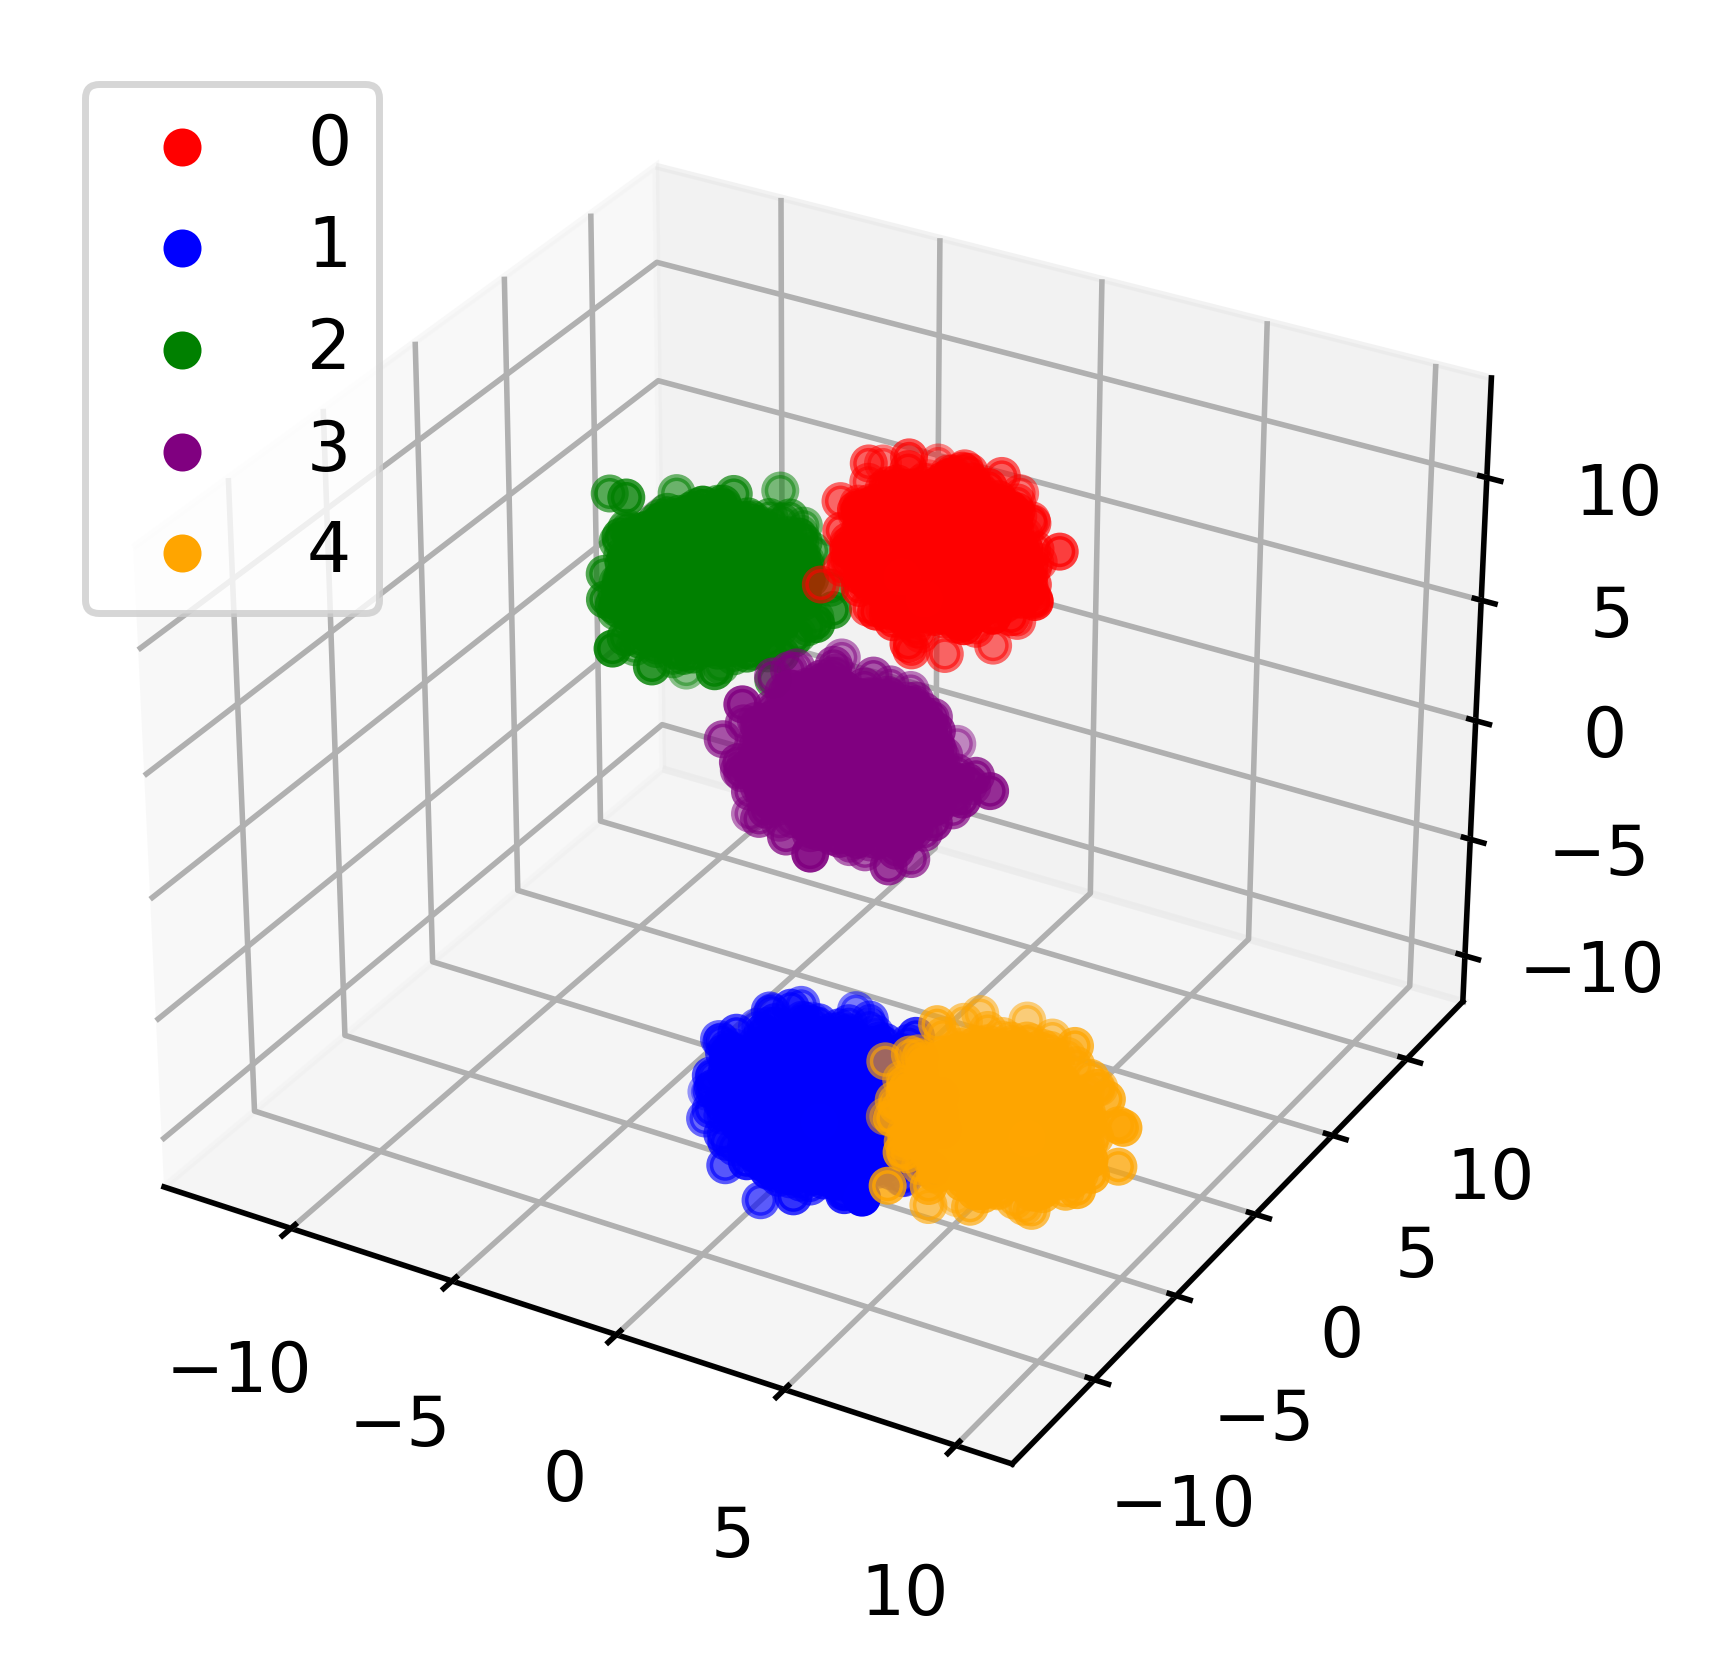

In [78]:
# Visualizing the dataset with "real" clusters
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')

for i in range(k):
    dt=df[data[1]==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

2. Implements a version of kmeans based on lists (thus, each line of the CSV is translated in a list)

In [79]:
data0=data[0].tolist()
data0[:5] # First five lists

[[1.6299756356763107, -8.685850406491166, -8.198776821304605],
 [4.986461030686848, -8.627623883392305, 7.409563813657679],
 [-7.740664945039409, 5.857463245100433, 3.2658458359619824],
 [0.38480043569014954, -6.1576002327948265, -8.51733750020001],
 [-1.8084613379198529, 8.735894957387343, 5.273240151071754]]

In [96]:
def square(list):
    return map(lambda x: x ** 2, list)

# Euclidean distance of 2 lists
def dist_list(ls1,ls2):
    diff=[a - b for a, b in zip(ls1, ls2)]
    return sqrt(sum(square(diff)))

# Euclidean distance of 2 numpy arrays
def dist_np(pt1,pt2):
    return np.sqrt(((pt1-pt2)**2).sum())

def list_kmeans(k, data, itr, thres):
    # Choosing k random datapoints to initialize the means
    means = sample(data, k)
    print(means)
    print("[[2.0975132688218623, -5.908740279137918, -7.605537336459342], [4.1919363605952, -12.246312499653499, 9.65604942615813], [7.162761881022666, -5.46940235100279, -6.741994581469366], [-7.97681386846722, 7.539072916143994, 0.9470063315337651], [-3.6065434916194086, 9.355208326757275, 4.553465329396488]]")
    count = 0
    compare = []
    
    while count<itr:
        count += 1
        
        # Dict to assign the cluster to each data point
        mean_dict = defaultdict(list)
        for point in data:
            tmp = None
            mindist = float('inf') # Initialize minimum distance to infinite
            
            for mean in means:
                # Finding the euclidean distance between the point under  
                # consideration and the centroids of previously formed clusters
                d = dist_list(mean,point)
                
                if d < mindist:
                    # Capturing the closest centroid for the given point 
                    mindist = d
                    tmp = mean
                    
            # Assiging the datapoint to the closest cluster
            mean_dict[str(tmp)].append(list(point))
        
        means=[] # List of centroids
        for mean in mean_dict:
            # Optimizing the centroids by taking the mean of all the 
            # points in a particular cluster as its new centroid
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        compare.append(np.array(means))
        
        # Checking for convergence of centroid for early stopping
        if len(compare)>1 and dist_np(compare[-1],compare[-2])<thres:
            return means, count
    return means, count

In [97]:
import random
random.seed(4000)
mu,it=list_kmeans(5,data0,1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')
print("\n")
print(f'The algorithm converged in {it} iterations')

[[2.0975132688218623, -5.908740279137918, -7.605537336459342], [4.1919363605952, -12.246312499653499, 9.65604942615813], [7.162761881022666, -5.46940235100279, -6.741994581469366], [-7.97681386846722, 7.539072916143994, 0.9470063315337651], [-3.6065434916194086, 9.355208326757275, 4.553465329396488]]
[[2.0975132688218623, -5.908740279137918, -7.605537336459342], [4.1919363605952, -12.246312499653499, 9.65604942615813], [7.162761881022666, -5.46940235100279, -6.741994581469366], [-7.97681386846722, 7.539072916143994, 0.9470063315337651], [-3.6065434916194086, 9.355208326757275, 4.553465329396488]]

The centroids of k-clusters are [[1.9448074313466086, -6.912250508363748, -6.872960992005454], [4.16063296525123, -9.578596361114037, 9.407972308887368], [-8.802262140502895, 7.313507084528769, 2.057496860008619], [-2.4942207425946314, 8.950627260978939, 4.647828369976595], [6.624815091815745, -5.724860270477349, -6.350858931304298]]


The algorithm converged in 4 iterations


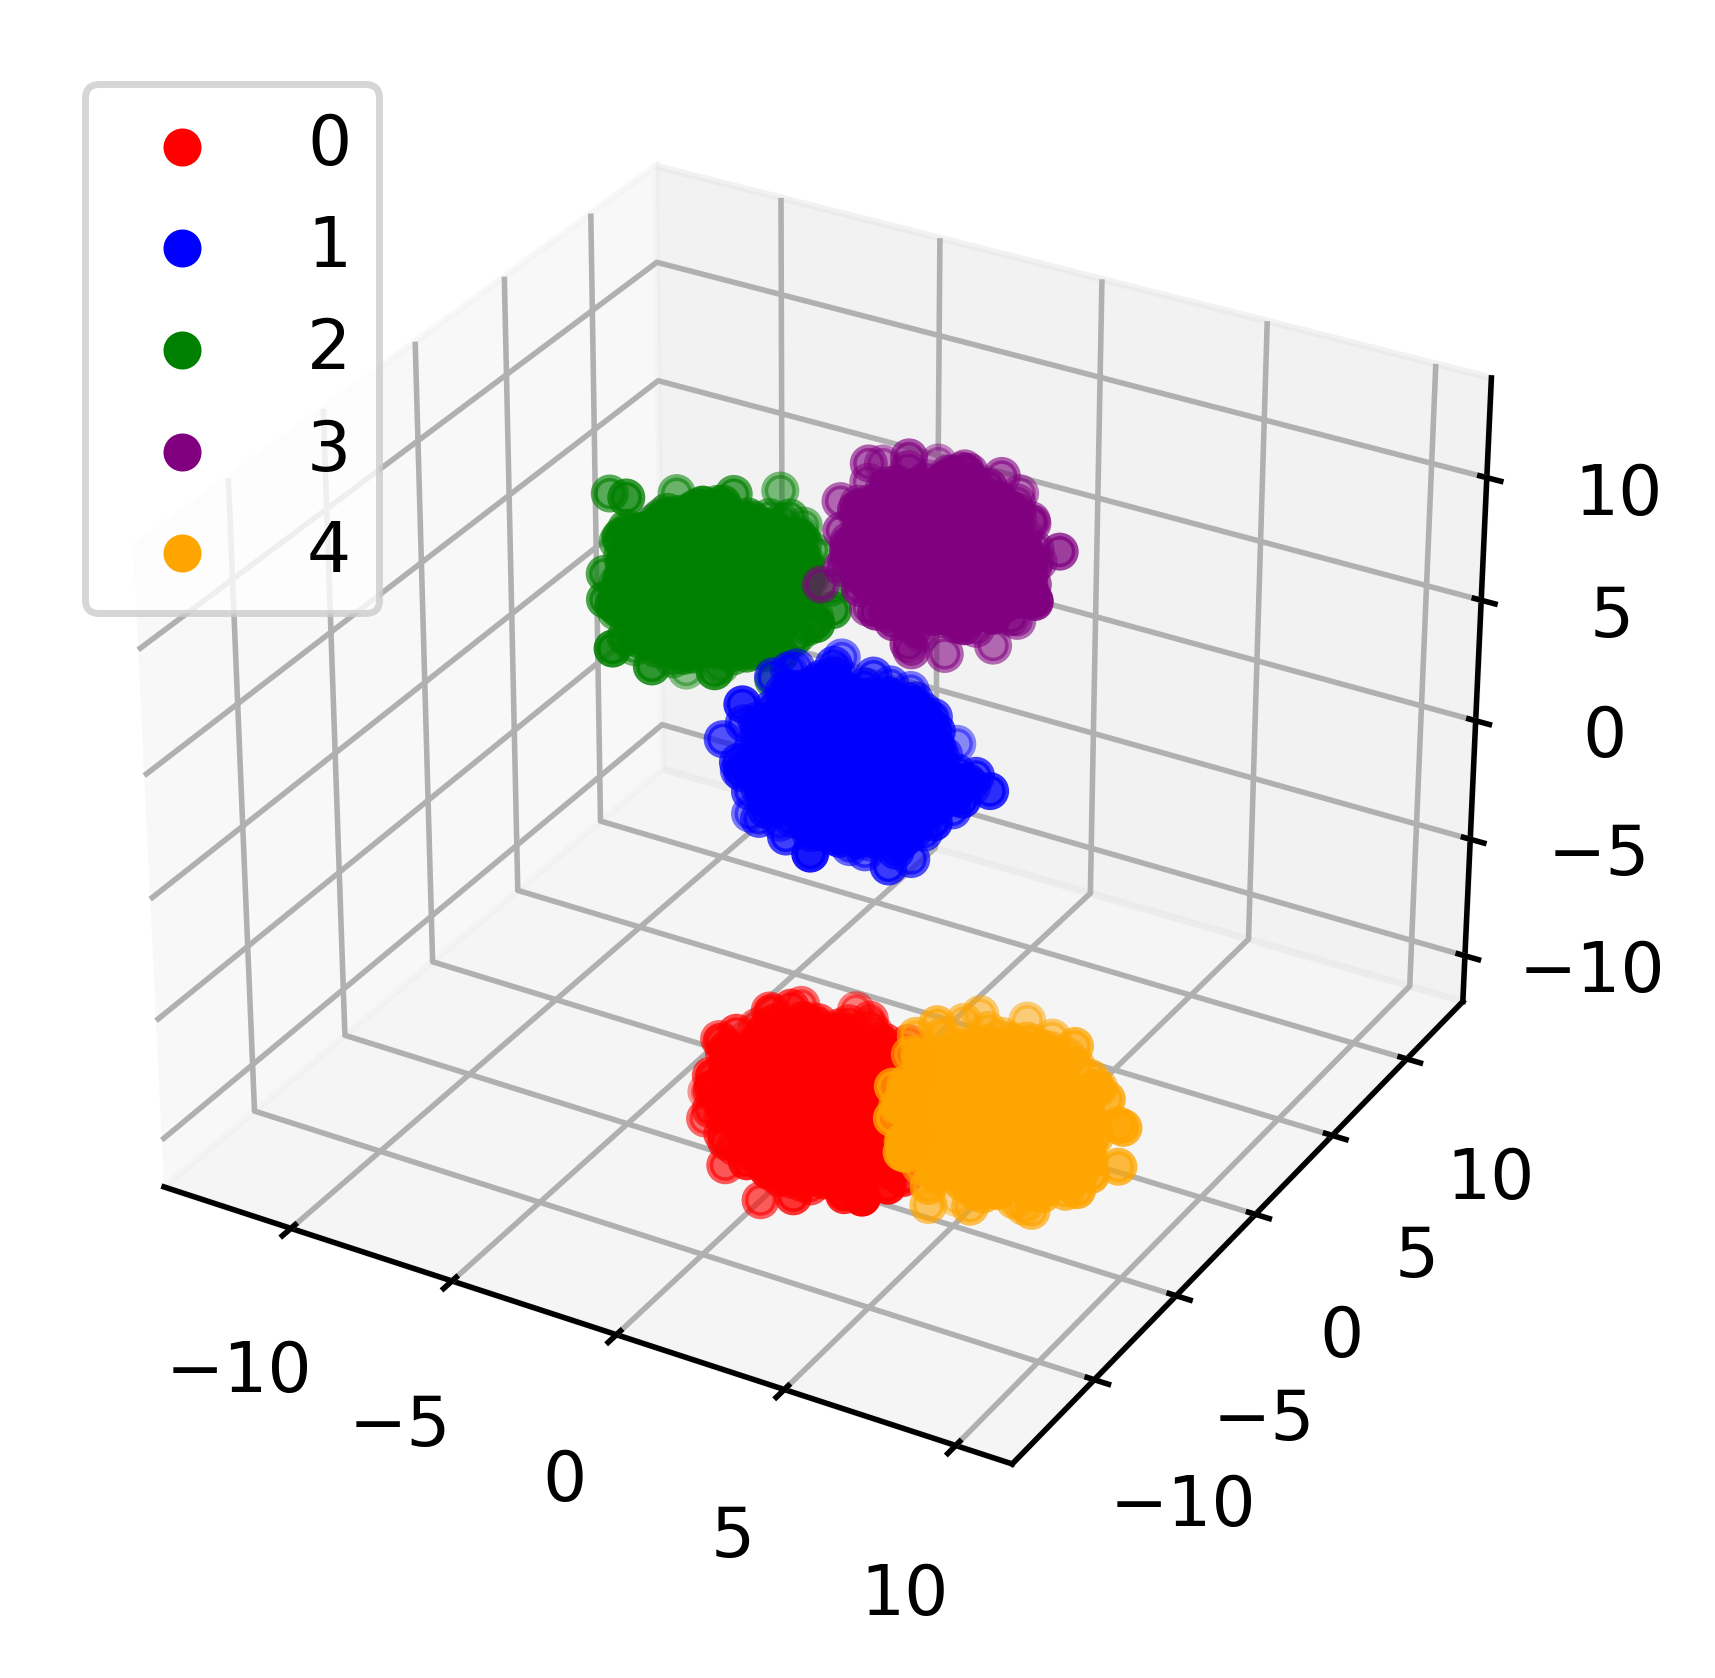

In [98]:
def coloring(point1,point2,point3,mu):
    mindist=float('inf')
    ans=None
    point=[point1,point2,point3]
    for i,pt in enumerate(mu):
        if dist_np(np.array(pt),np.array(point))<mindist:
            mindist=dist_np(np.array(pt),np.array(point))
            ans=i
    return ans

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,mu),axis=1)

# Visualizing the dataset based on the clusters that we created using k-means clustering algorithm
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')

for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

3. Implements a version of kmeans based on numpy vectors (thus, each line of the CSV is translated in a numpy vector)

In [130]:
def npkmeans(k,data,itr,thres):   
    # Choosing k random datapoints to initialize the means
    means=data[np.random.choice(data.shape[0], k, replace=False)]
    count=0
    compare=[]
    
    # Outer while loop to control the number of iterations using count
    while count<itr:
        count+=1
        
        # Initializing hash table to assign the cluster to each data point
        mean_dict=defaultdict(list)
        for point in data:
            tmp=None
            mindist=float('inf')
            
            for mean in means:
                # Finding the distance between the point under consideration 
                # and the centroids of previously formed clusters
                d=dist_np(mean,point)
                
                if d<mindist:
                    # Capturing the closest centroid for the given point 
                    mindist=d
                    tmp=mean
                    
            # Assiging the datapoint to the closest cluster
            mean_dict[str(tmp)].append(list(point))
        
        means=[]
        for mean in mean_dict:
            # Optimizing the centroids by taking the mean of all the points
            # in a particular cluster as its new centroid
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        compare.append(np.array(means))
        
        # Checking for convergence of centroid for early stopping
        if len(compare)>1 and dist_np(compare[-1],compare[-2])<thres:
            return means, count
    return means, count

In [133]:
np.random.seed(98765432)
mu,it = npkmeans(5,data[0],1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')
print("\n")
print(f'The algorithm converged in {it} iterations')

[[  6.81733739  -6.49624841  -7.98861092]
 [-10.70180057   7.29488839   1.53393315]
 [  4.7468108   -8.93140569   8.95681653]
 [  2.60371389  -7.46984693  -8.12101866]
 [ -4.13551698   8.48434836   4.86450462]]
[[1.9436979512648571, -6.9126504491918865, -6.873450977271873], [4.16063296525123, -9.578596361114037, 9.407972308887368], [-8.802262140502895, 7.313507084528769, 2.057496860008619], [-2.4942207425946314, 8.950627260978939, 4.647828369976595], [6.62358517027456, -5.725055050571822, -6.350633573782171]]

The centroids of k-clusters are [[1.9448074313466086, -6.912250508363748, -6.872960992005454], [4.16063296525123, -9.578596361114037, 9.407972308887368], [-8.802262140502895, 7.313507084528769, 2.057496860008619], [-2.4942207425946314, 8.950627260978939, 4.647828369976595], [6.624815091815745, -5.724860270477349, -6.350858931304298]]


The algorithm converged in 4 iterations


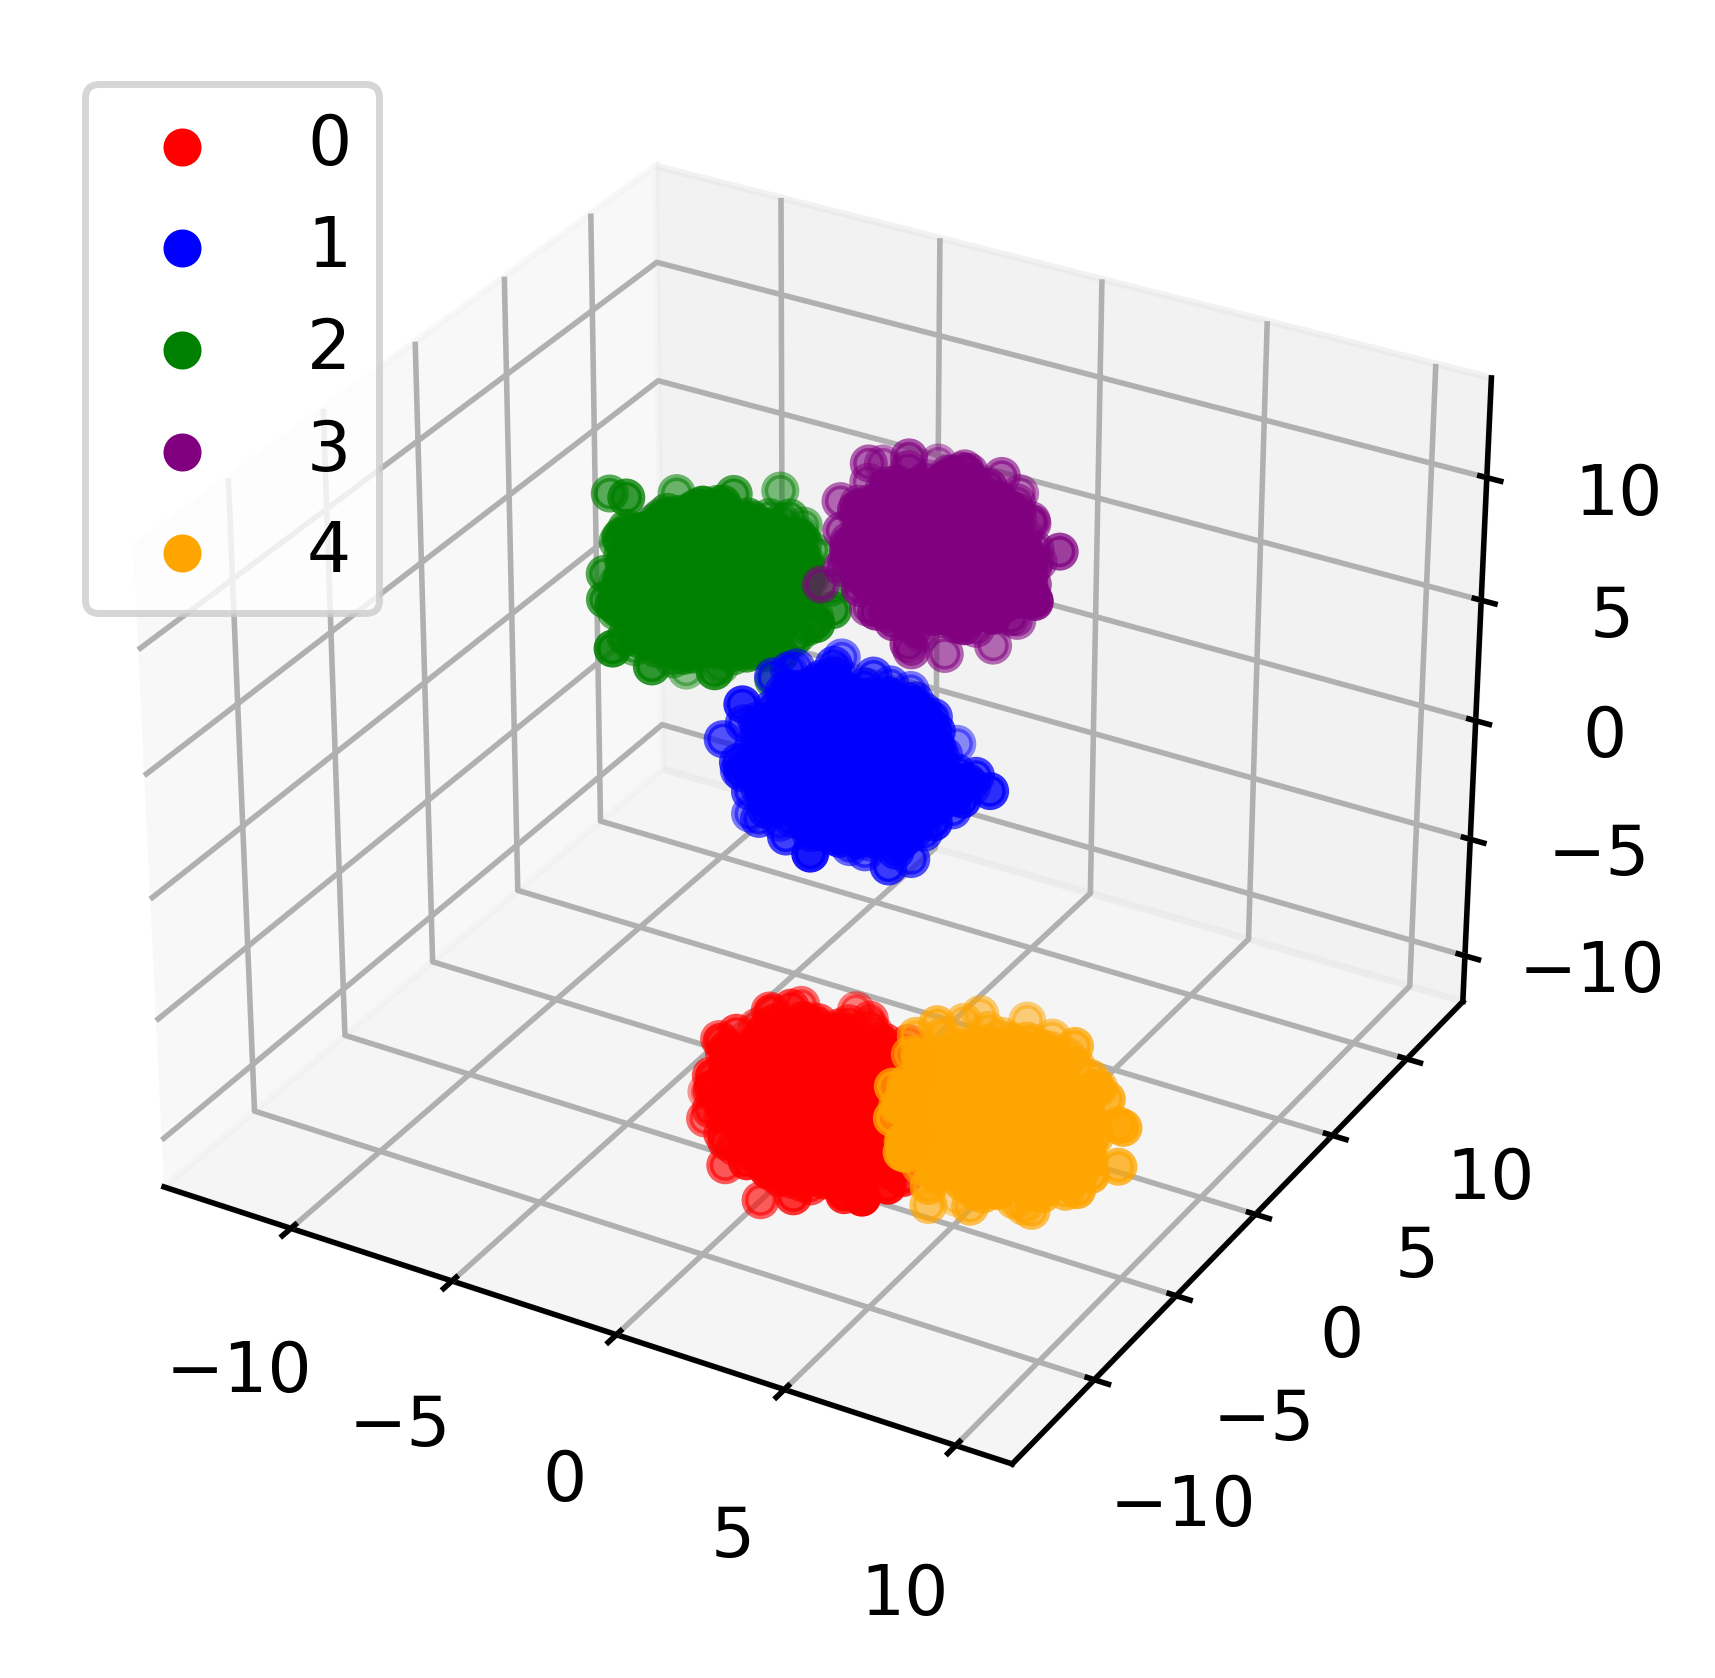

In [134]:
df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,mu),axis=1)

# visualizing the given dataset based on the clusters that we created using k-means clustering algorithm
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')

for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

4. Test the two implementations providing charts and visual representations that show, depending on the size of the vectors, the number of the vectors and the number of clusters, how the performance changes.

First of all let's run `sklearn.KMeans` to compare the output.


The centroids of k-clusters are [[1.9436979512648584, -6.912650449191894, -6.873450977271872], [-8.802262140502897, 7.313507084528764, 2.0574968600086185], [-2.4942207425946314, 8.950627260978923, 4.647828369976588], [6.623585170274564, -5.7250550505718145, -6.3506335737821775], [4.160632965251229, -9.578596361114018, 9.407972308887382]]


The algorithm converged in 5 iterations


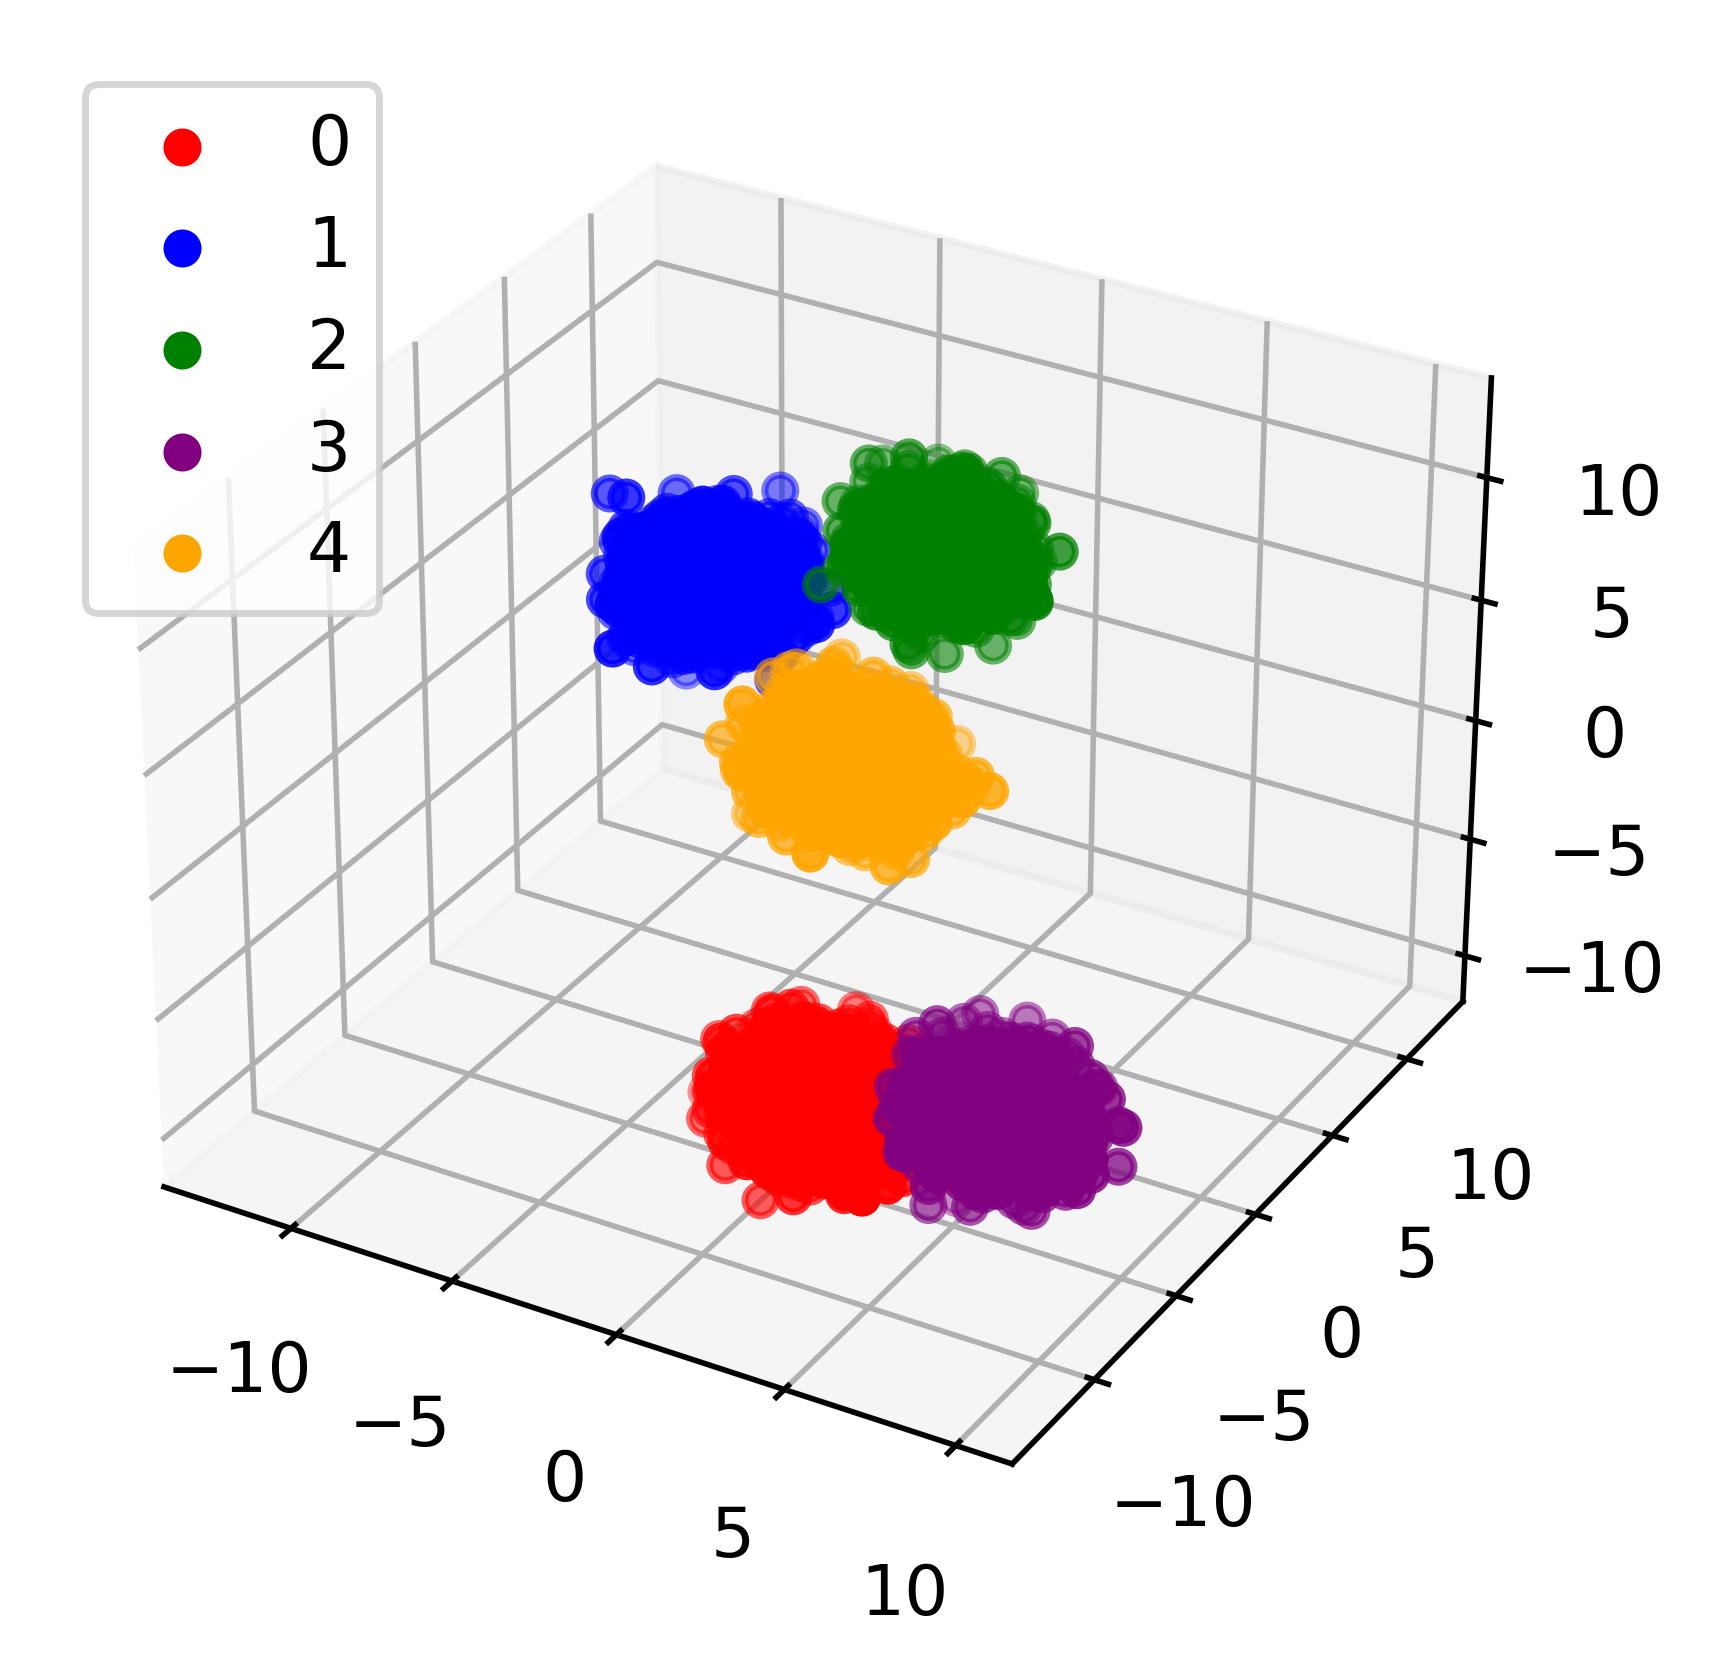

In [135]:
model = KMeans(n_clusters=k,init='random',max_iter=1000,tol=10**-4,random_state=42)
y_predict = model.fit_predict(data[0])
print(f'\nThe centroids of k-clusters are {model.cluster_centers_.tolist()}')
print("\n")
print(f'The algorithm converged in {model.n_iter_} iterations')

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,model.cluster_centers_.tolist()),axis=1)

# Visualizing the  dataset based on the clusters that sklearn.KMeans created
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')

for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

Let's compare the 3 algorithms' efficiency (running 10 times each).

In [22]:
starttime=time.time()
list_iterations = 0
for i in range(10):   
    _,it = list_kmeans(5,data0,1000,10**-4)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' mean time: {list_stopwatch/10.}")
print(f"List-based K-means' mean iterations: {list_iterations/10.}")

starttime=time.time()
np_iterations = 0
for i in range(10): 
    _,it = npkmeans(5,data[0],1000,10**-4)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' mean time: {np_stopwatch/10.}")
print(f"npArray-based K-means' mean iterations: {np_iterations/10.}")

model = KMeans(n_clusters=k, init='random',max_iter=1000,tol=10**-4)
starttime=time.time()
sklearn_iterations = 0
for i in range(10):    
    model.fit_predict(data[0])
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' mean time: {sklearn_stopwatch/10.}")
print(f"sklearn K-means' mean iterations: {sklearn_iterations/10.}")

List-based K-means' time: 3.797328495979309
List-based K-means' iterations: 26.9
npArray-based K-means' time: 9.340766000747681
npArray-based K-means' iterations: 25.9
sklearn K-means' time: 0.04695119857788086
sklearn K-means' iterations: 3.7


[37.97328495979309, 93.4076600074768, 0.4695119857788086]


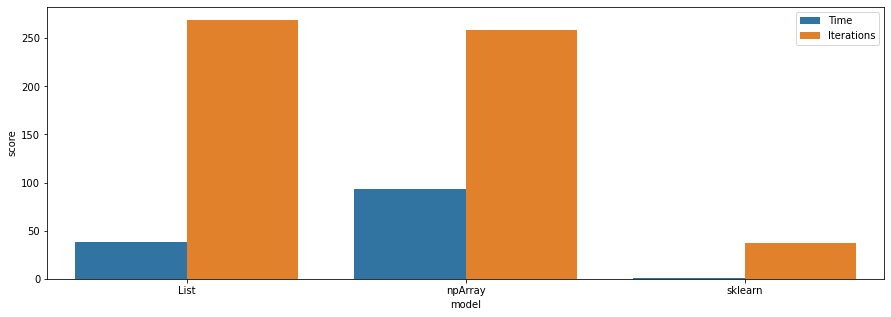

In [23]:
data = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch)
scores.append(np_stopwatch)
scores.append(sklearn_stopwatch)
it.append(list_iterations)
it.append(np_iterations)
it.append(sklearn_iterations)
print(scores)
data['model'] = ['List', 'npArray', 'sklearn'] * 2
data['metric'] = ['Time'] * len(scores) + ['Iterations'] * len(it)
data['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=data, hue='metric')
_ = plt.legend(loc='upper right')

As we can see from the histogram, `sklearn.KMeans` is the most efficient implementation. List implementation is faster than the one based on numpy arrays (basically the only difference is on how we compute distances, and the euclidean list distance seems to be more efficient).

Let's compare the algorithms running with a wrong number of clusters (in eccess, i.e. $8$ instead of $5$).

List-based K-means' time: 8.662811708450317
List-based K-means' iterations: 42.1


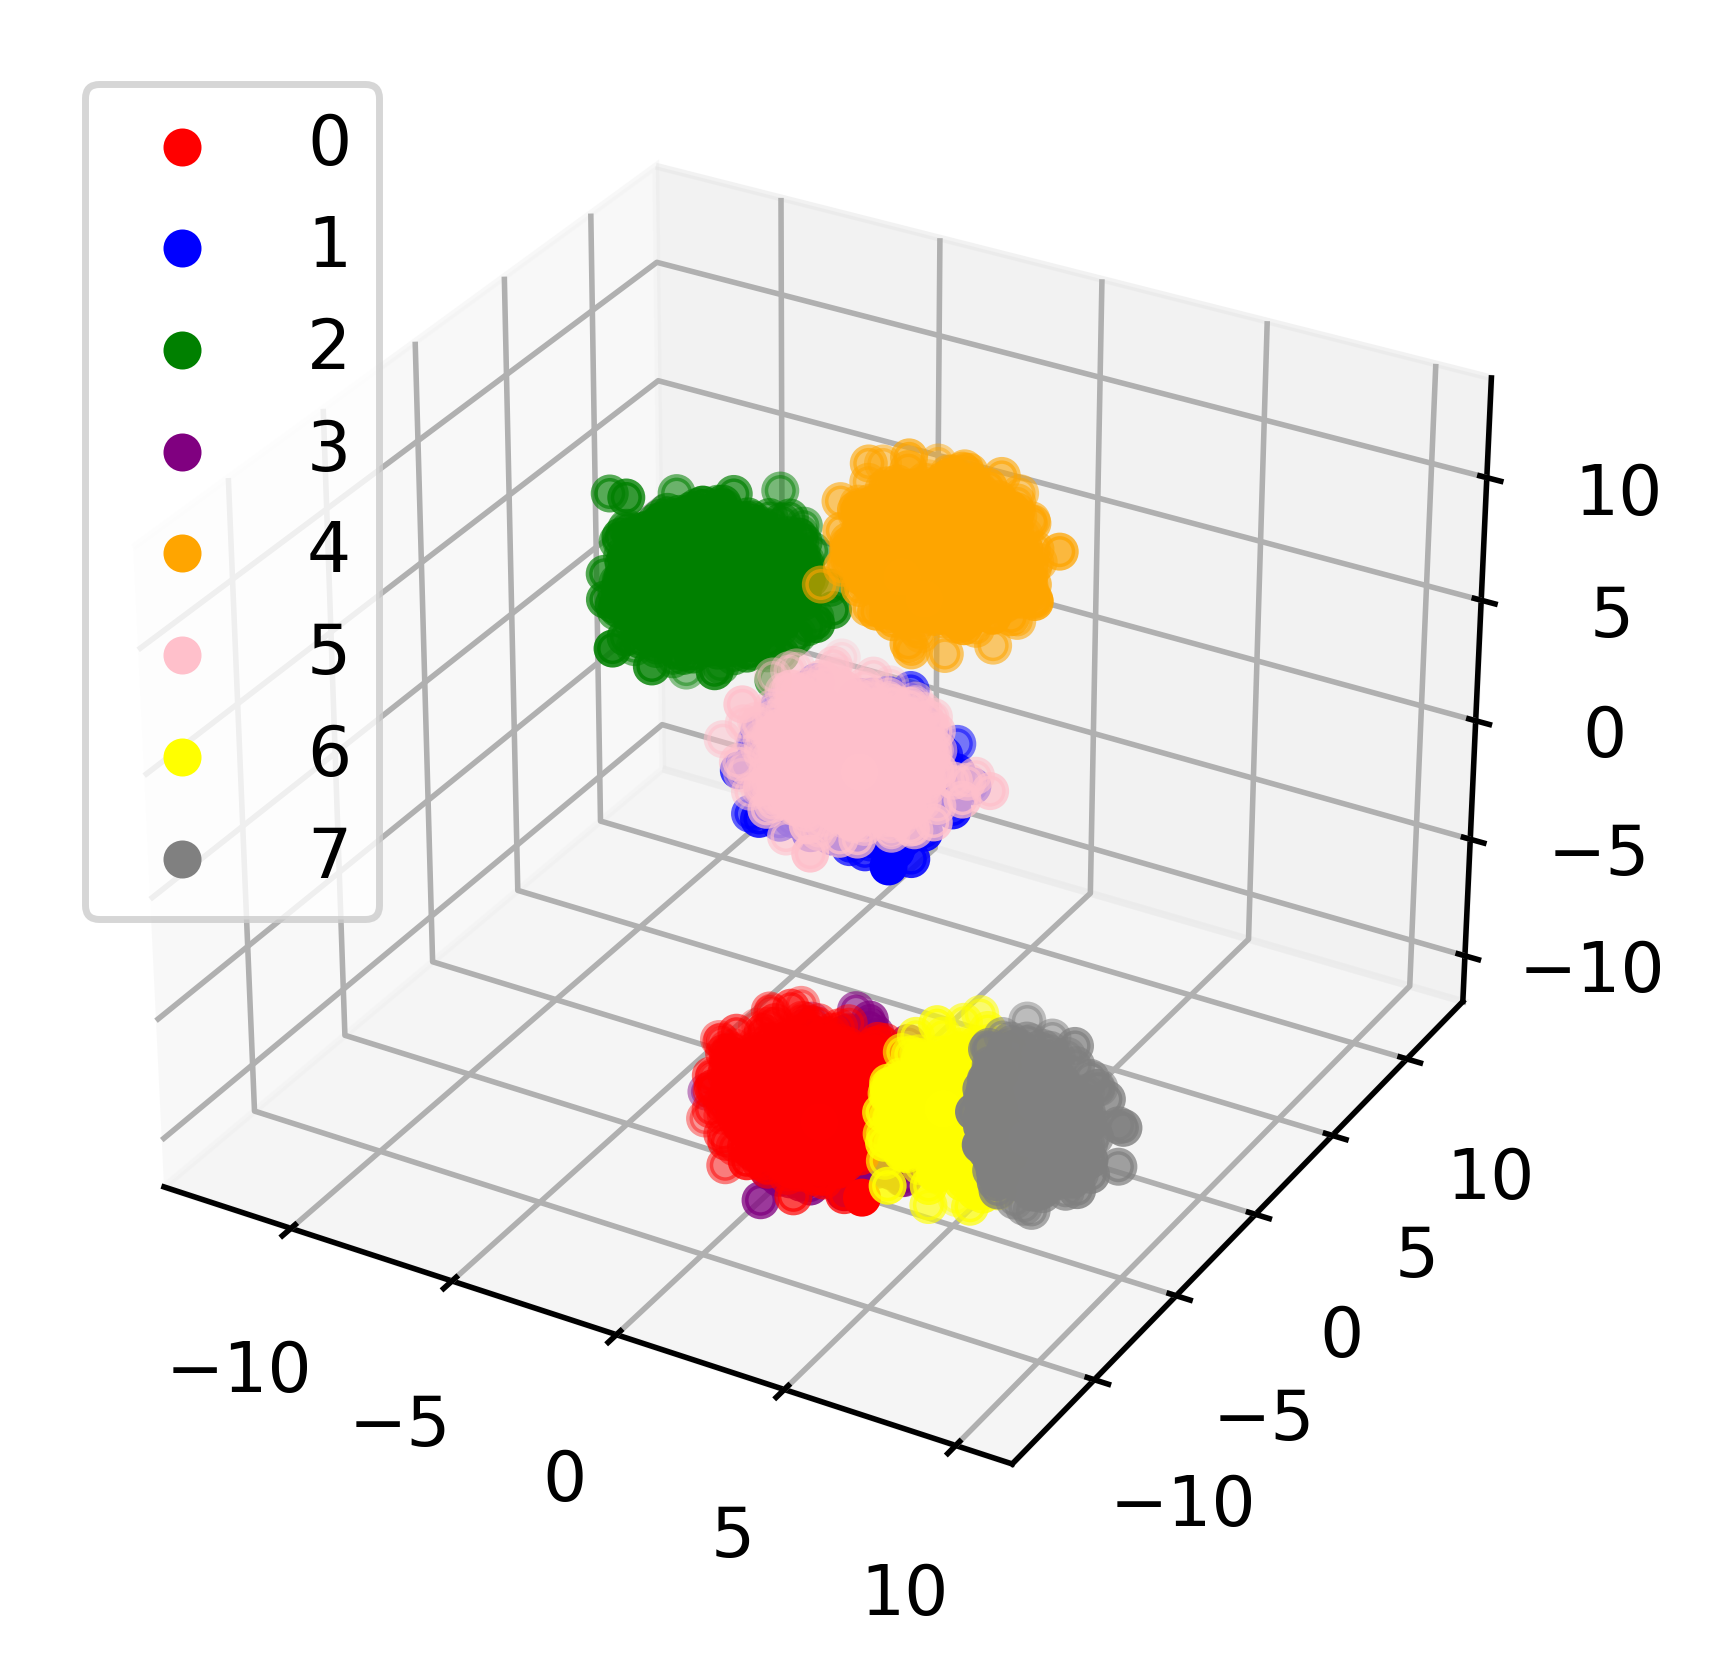

In [29]:
starttime=time.time()
list_iterations = 0
for i in range(10):   
    mu,it = list_kmeans(8,data0,1000,10**-4)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' mean time: {list_stopwatch/10.}")
print(f"List-based K-means' mean iterations: {list_iterations/10.}")

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,mu),axis=1)

fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow','Grey')

for i in range(8):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

npArray-based K-means' mean time: 22.042453813552857
npArray-based K-means' mean iterations: 39.8


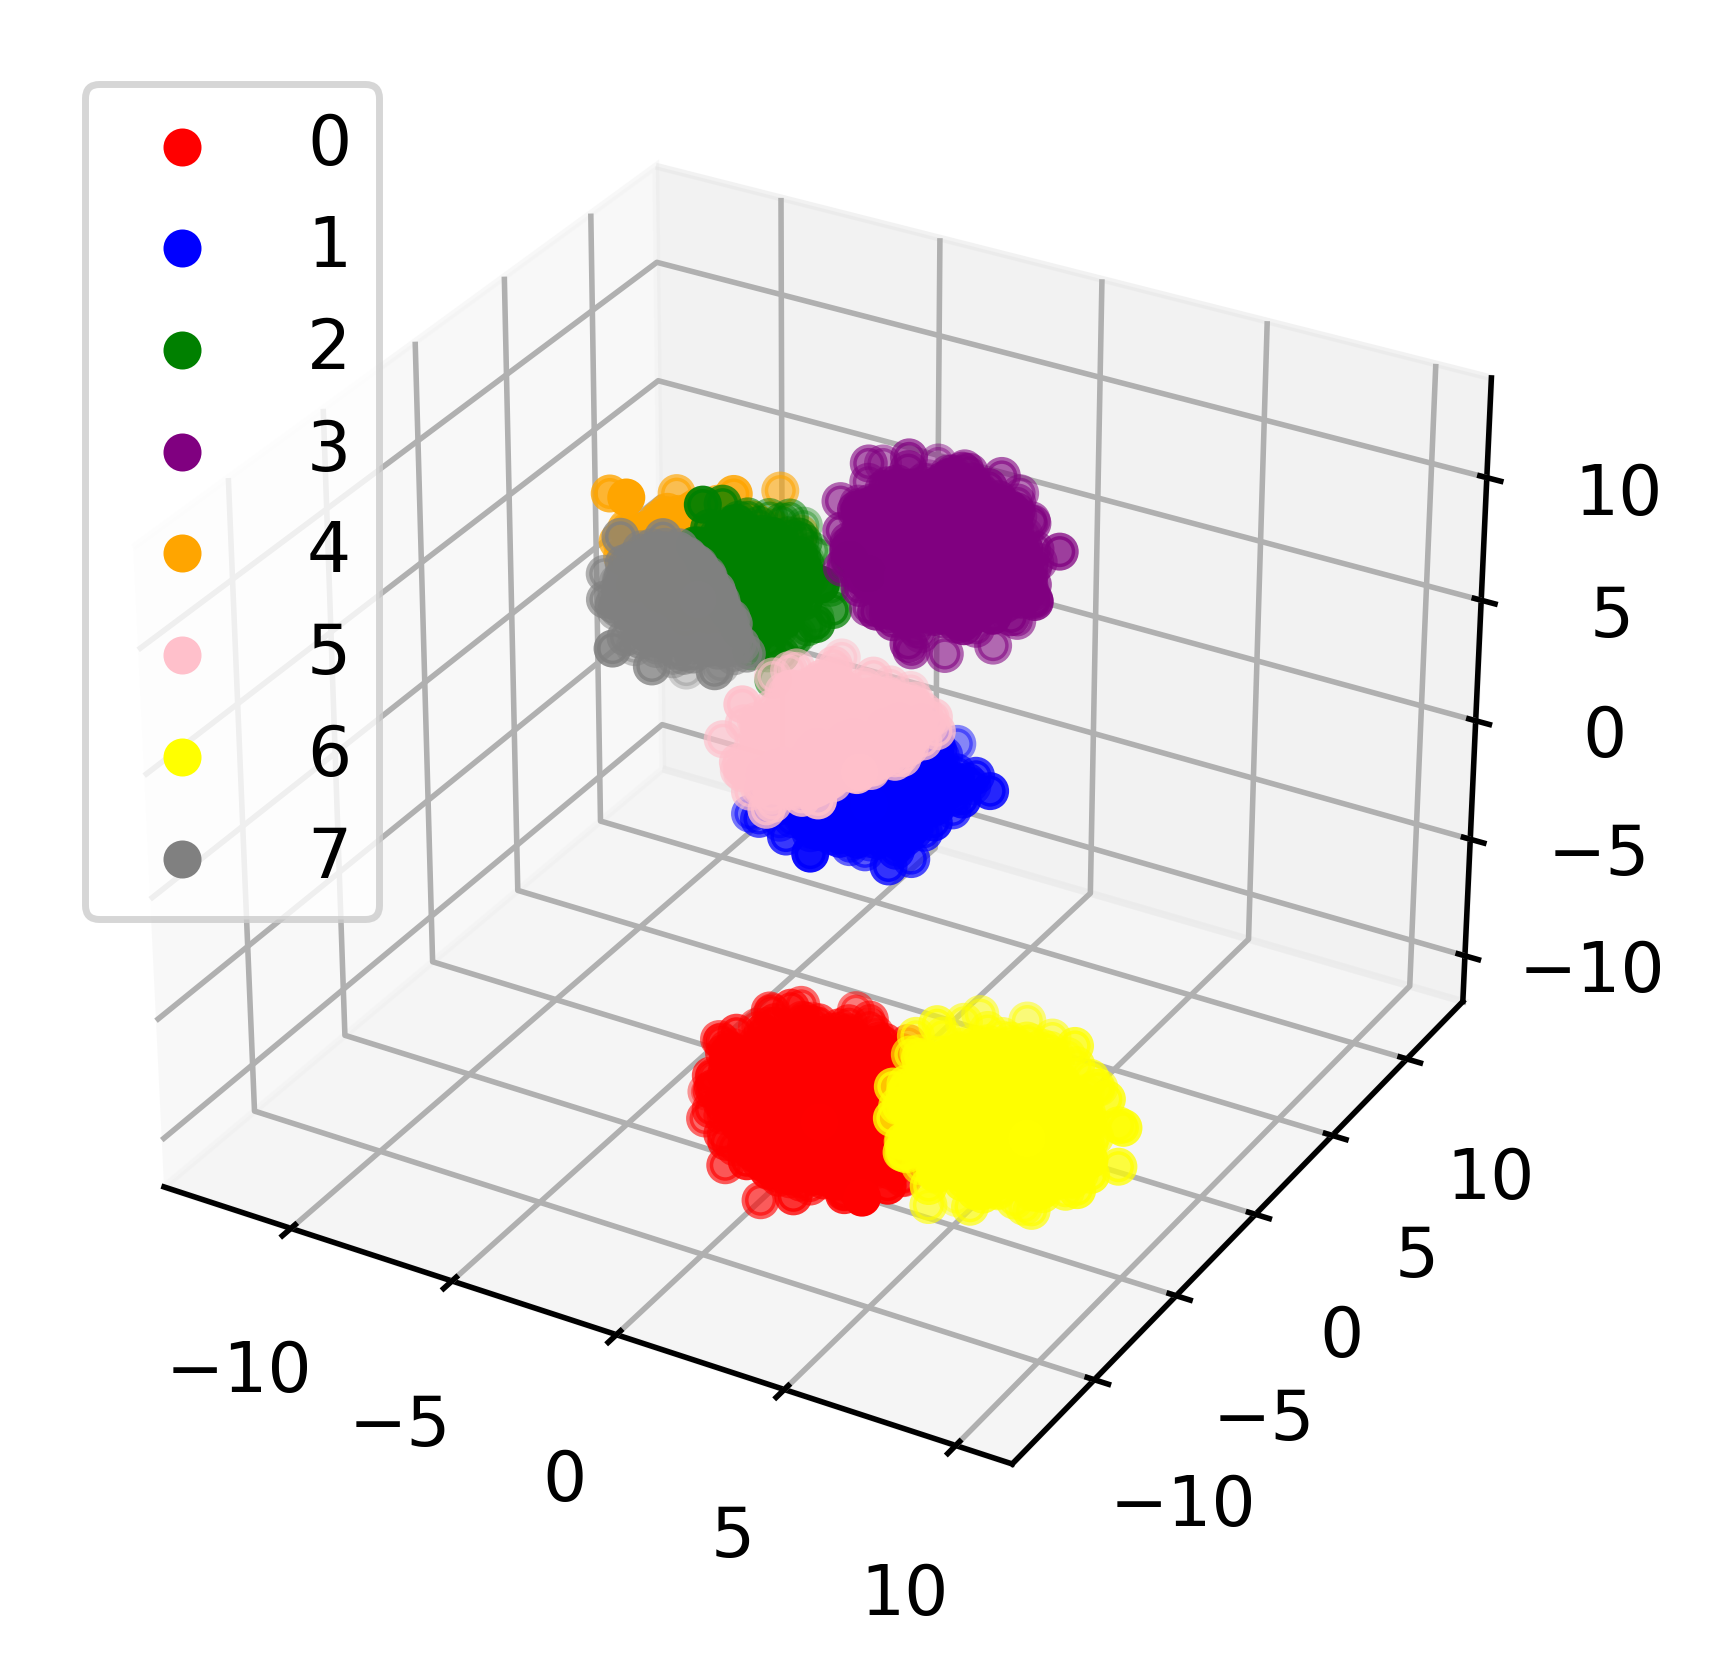

In [51]:
starttime=time.time()
np_iterations = 0
for i in range(10):   
    mu,it = npkmeans(8,data[0],1000,10**-4)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' mean time: {np_stopwatch/10.}")
print(f"npArray-based K-means' mean iterations: {np_iterations/10.}")

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,mu),axis=1)

fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow','Grey')

for i in range(8):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

sklearn K-means' time: 0.07881817817687989
sklearn K-means' iterations: 11.1


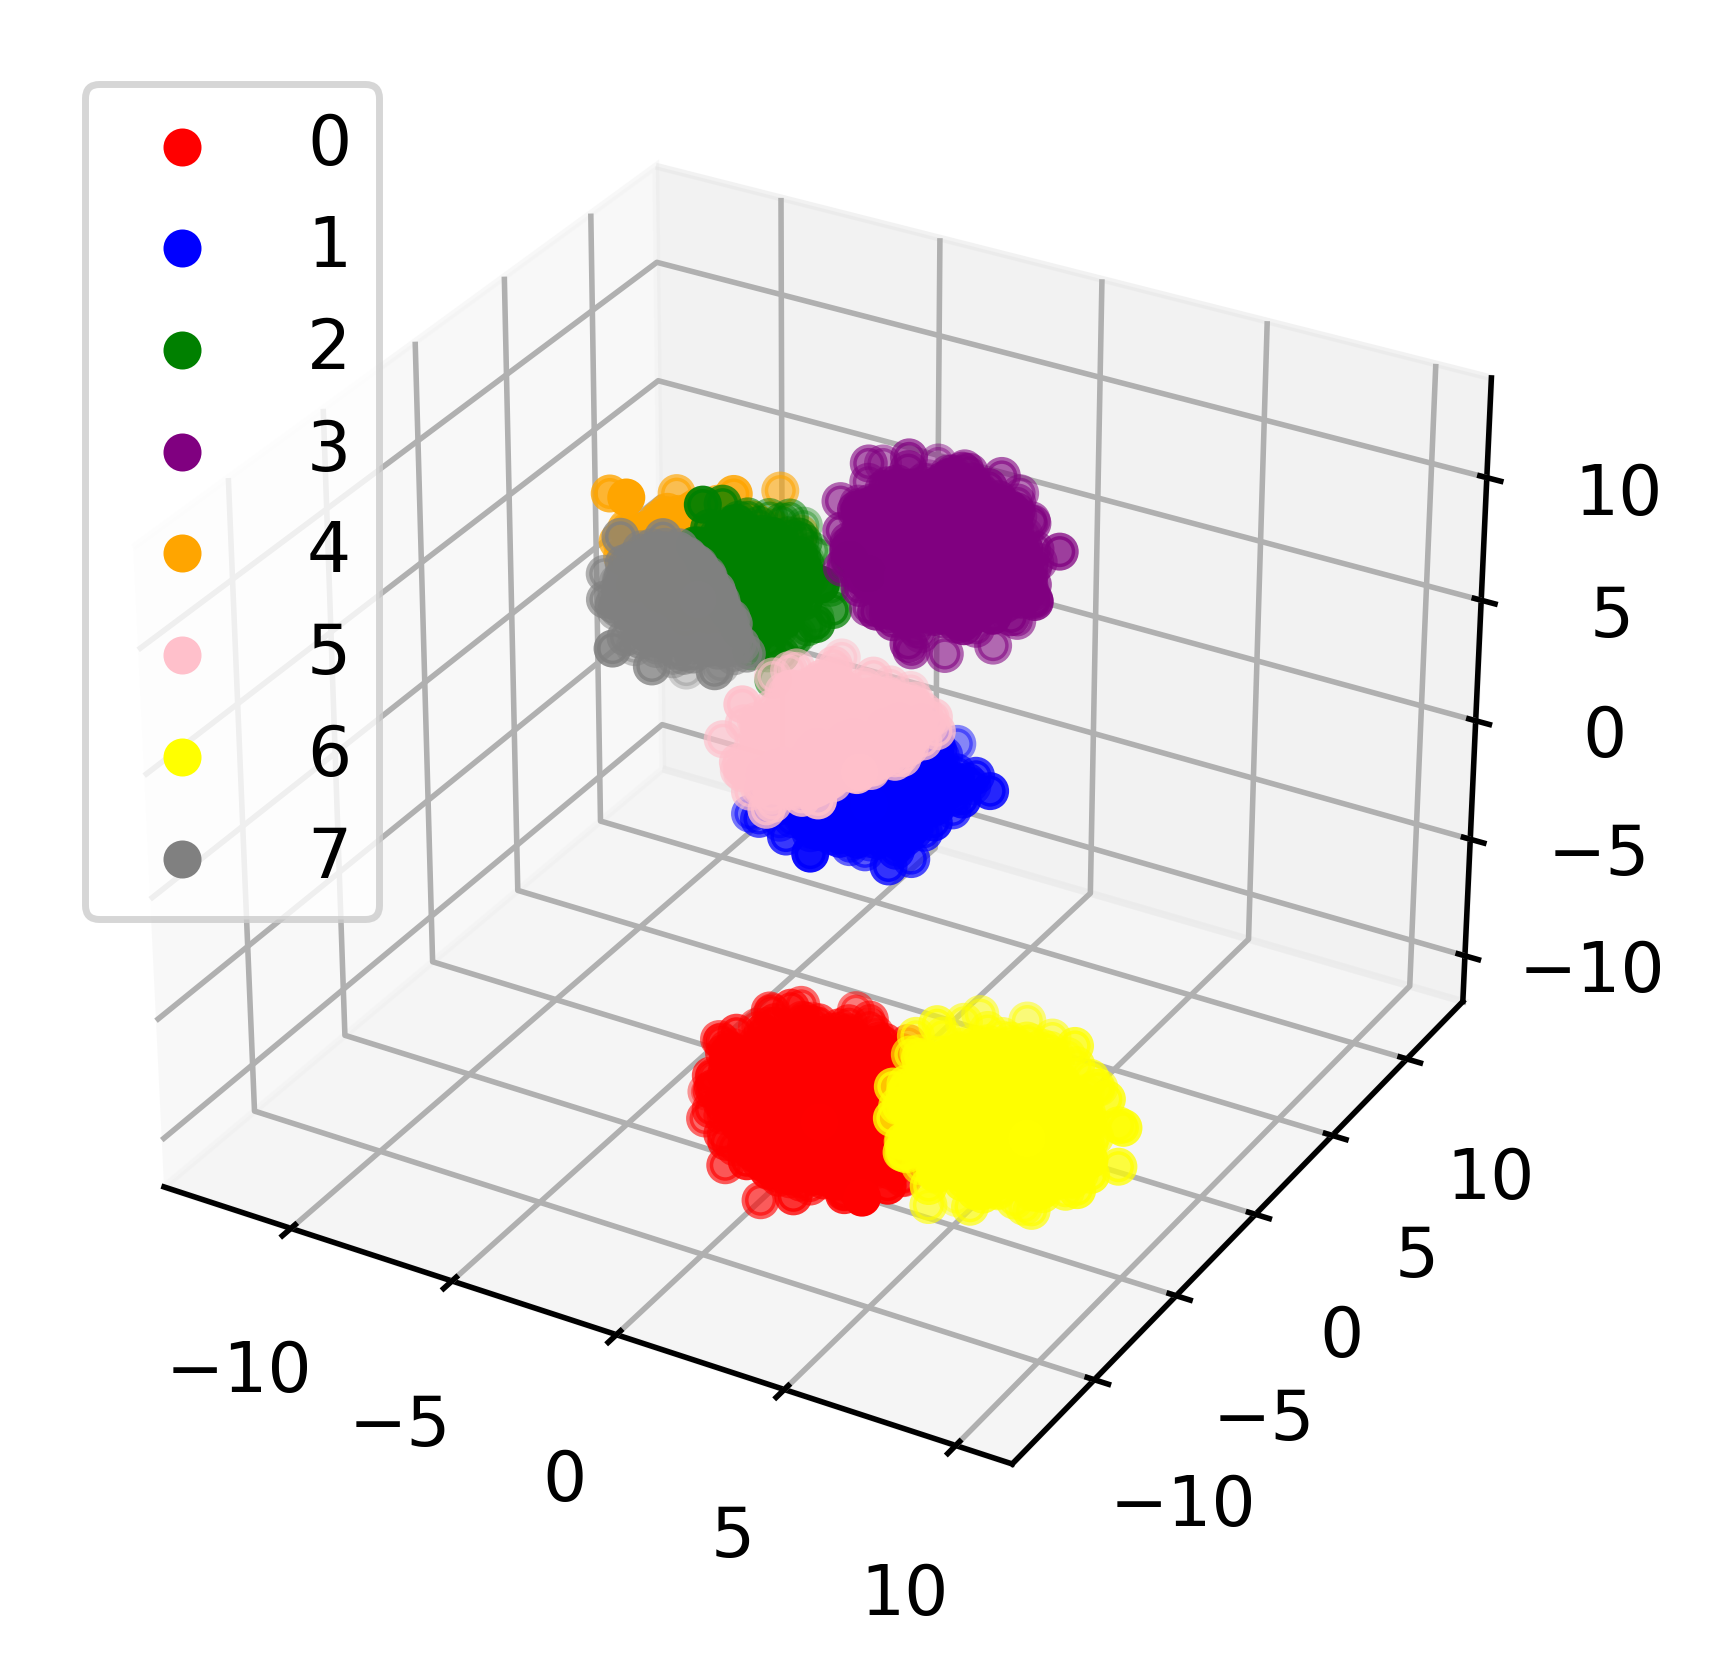

In [53]:
model = KMeans(n_clusters=8, init='random',max_iter=1000,tol=10**-4)
starttime=time.time()
sklearn_iterations = 0
for i in range(10):    
    model.fit_predict(data[0])
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' time: {sklearn_stopwatch/10.}")
print(f"sklearn K-means' iterations: {sklearn_iterations/10.}")

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow','Grey')

for i in range(8):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

In [ ]:
data = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch)
scores.append(np_stopwatch)
scores.append(sklearn_stopwatch)
it.append(list_iterations)
it.append(np_iterations)
it.append(sklearn_iterations)
print(scores)
data['model'] = ['List', 'npArray', 'sklearn'] * 2
data['metric'] = ['Time'] * len(scores) + ['Iterations'] * len(it)
data['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=data, hue='metric')
_ = plt.legend(loc='upper right')

`sklearn.KMeans` always performs best; this time list-based implementation is working pretty similar.

Let's compare the algorithms running with a wrong number of clusters (this time in defect, i.e. $3$ instead of $5$).

List-based K-means' time: 0.32981703281402586
List-based K-means' iterations: 3.5


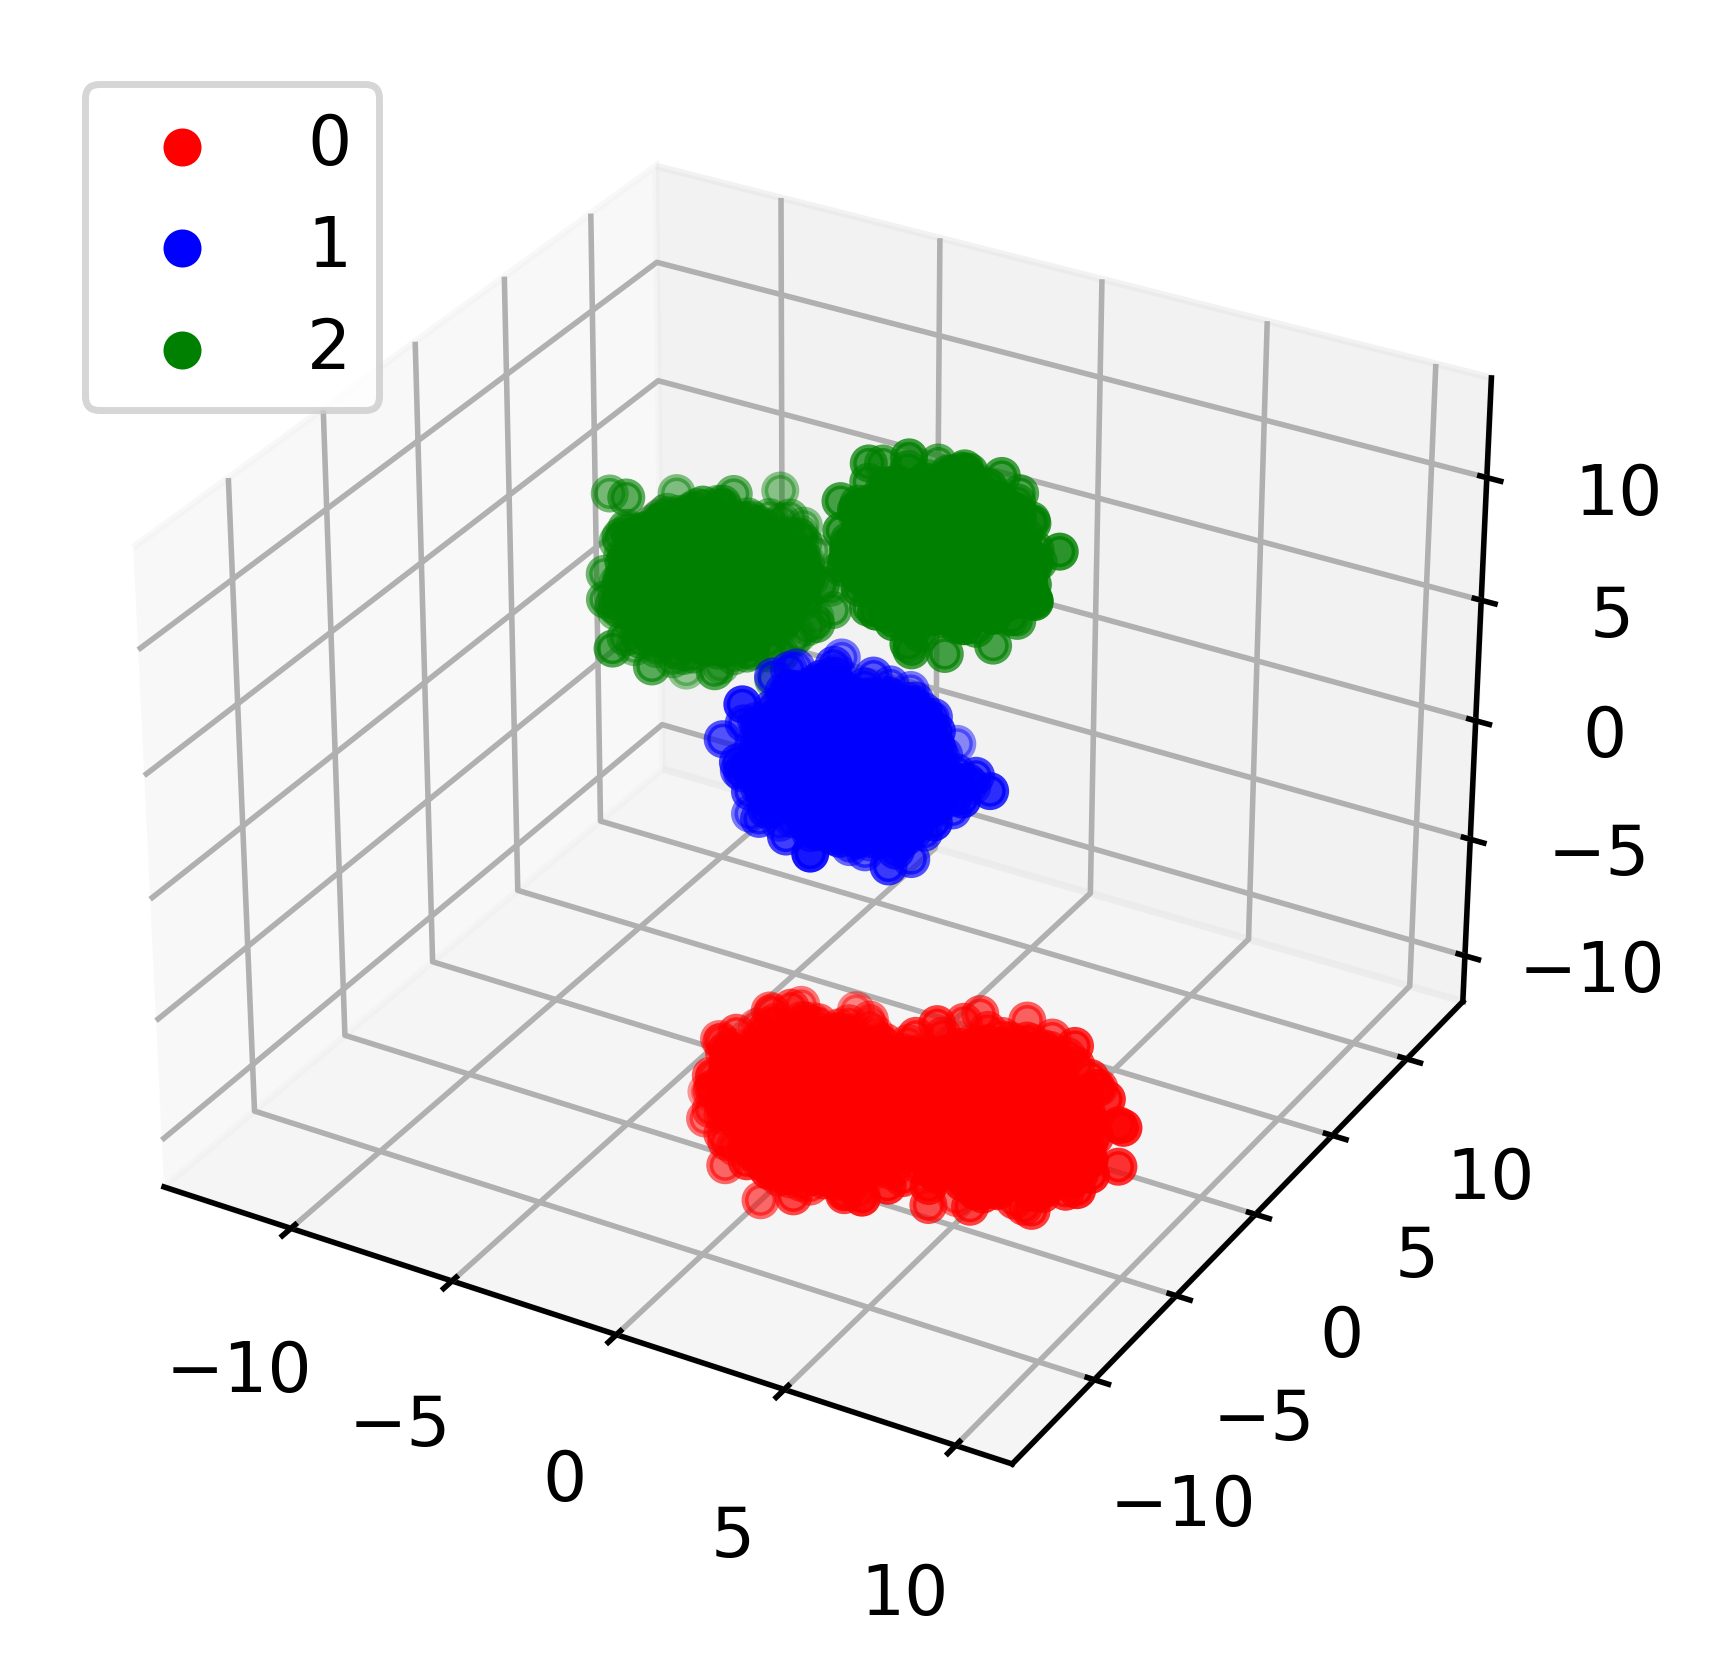

In [54]:
starttime=time.time()
list_iterations = 0
for i in range(10):   
    mu,it = list_kmeans(3,data0,1000,10**-4)
    list_iterations += it
list_stopwatch = time.time() - starttime
print(f"List-based K-means' time: {list_stopwatch/10.}")
print(f"List-based K-means' iterations: {list_iterations/10.}")

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,mu),axis=1)

fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow','Grey')

for i in range(3):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

npArray-based K-means' time: 1.5162484884262084
npArray-based K-means' iterations: 3.7


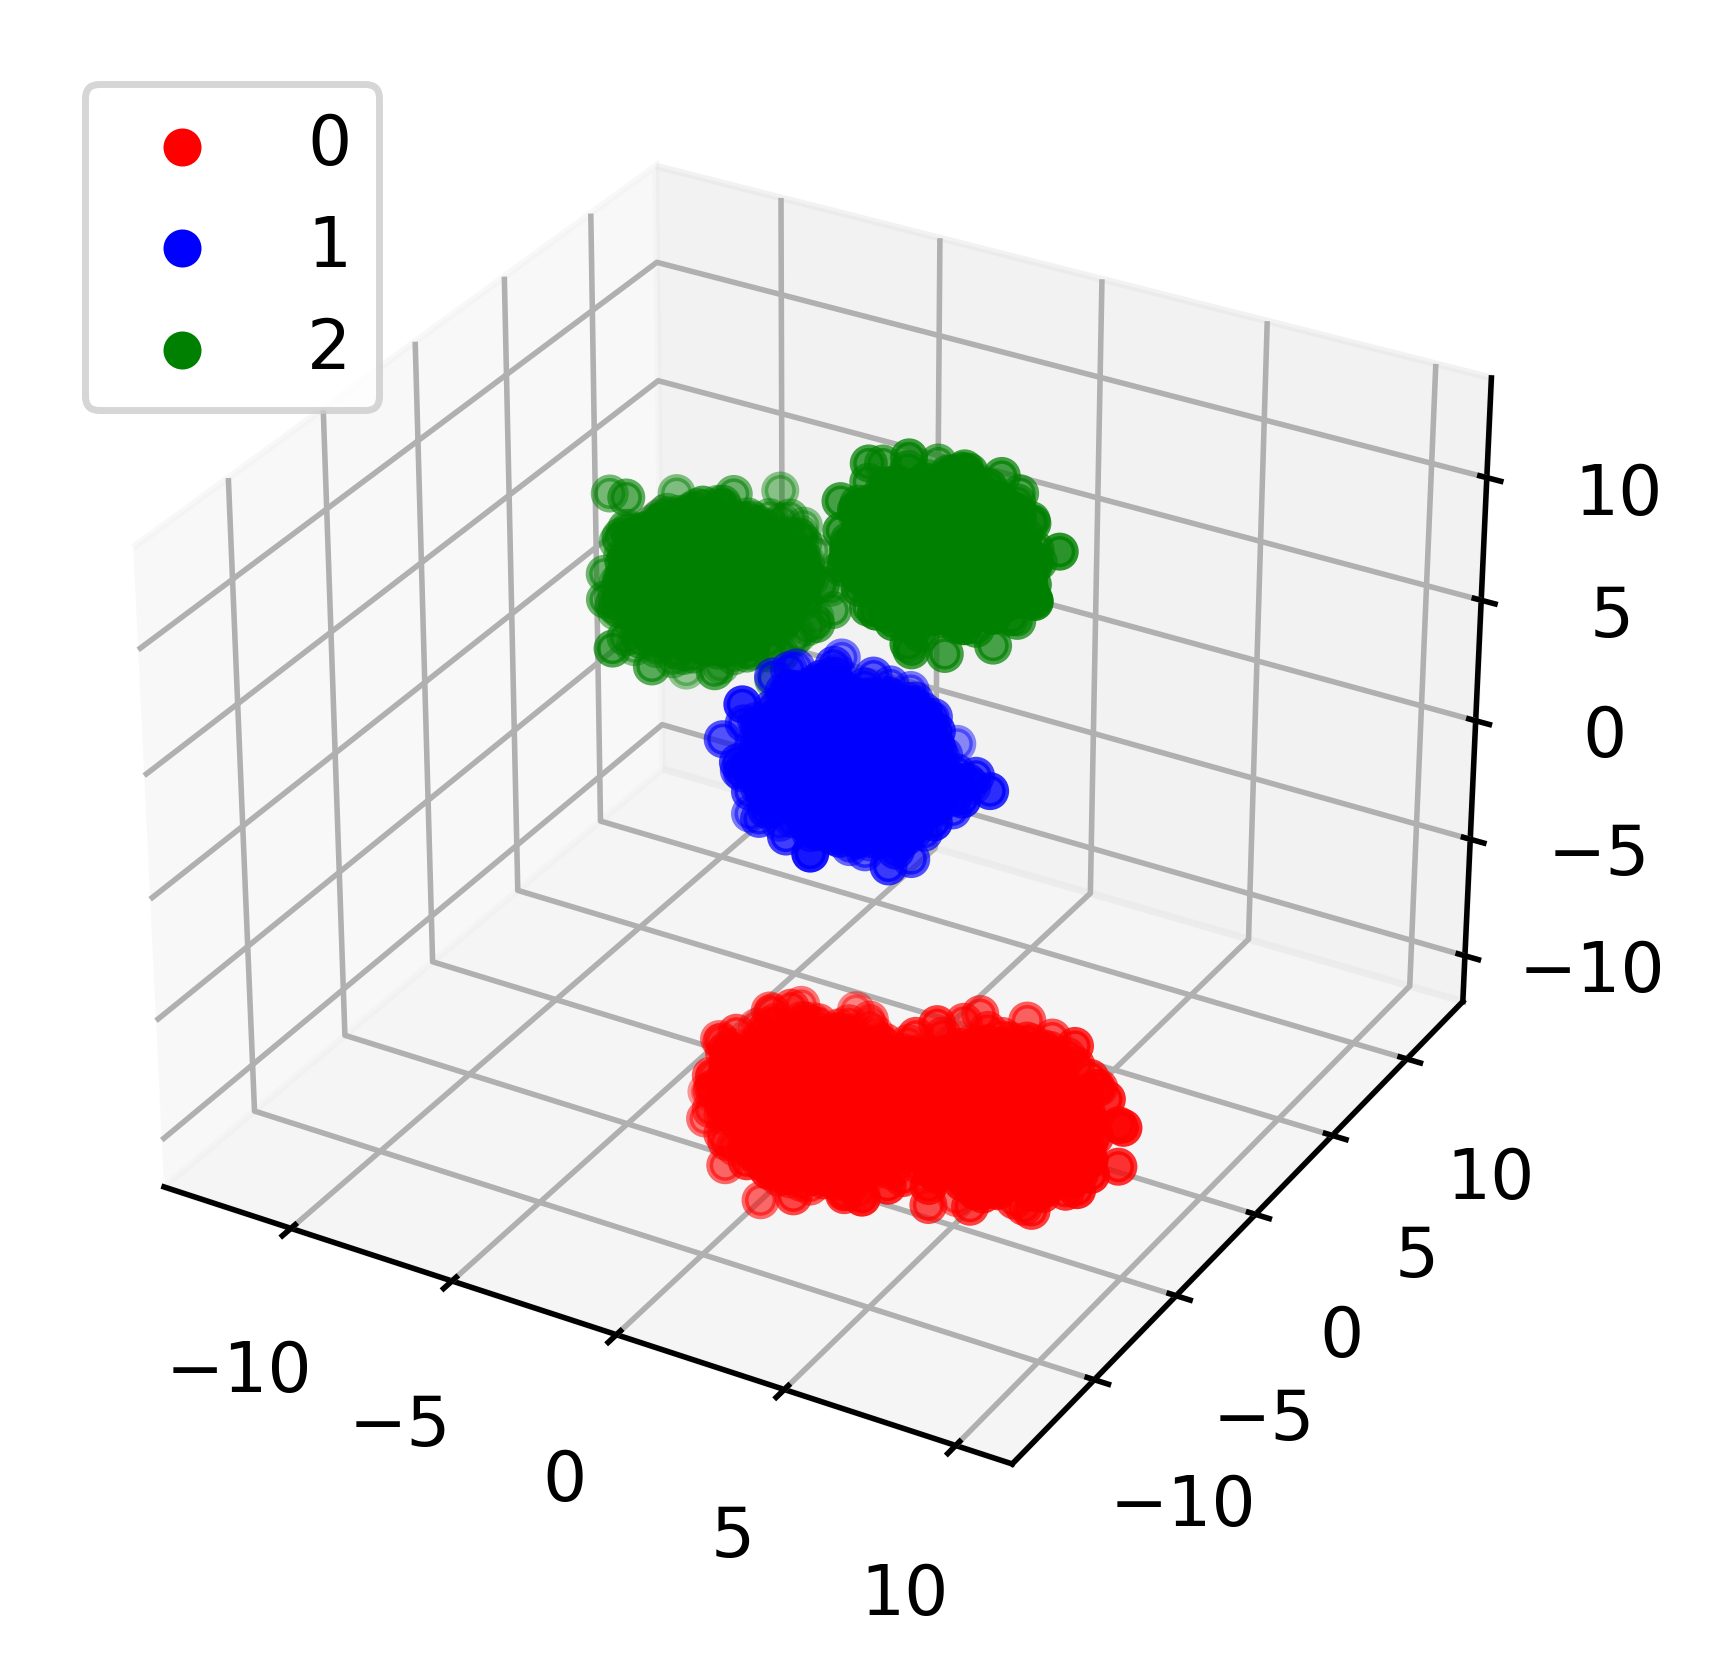

In [55]:
starttime=time.time()
np_iterations = 0
for i in range(10): 
    mu,it = npkmeans(3,data[0],1000,10**-4)
    np_iterations += it
np_stopwatch = time.time() - starttime
print(f"npArray-based K-means' time: {np_stopwatch/10.}")
print(f"npArray-based K-means' iterations: {np_iterations/10.}")

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,mu),axis=1)

fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow','Grey')

for i in range(3):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

sklearn K-means' time: 0.03016641139984131
sklearn K-means' iterations: 3.2


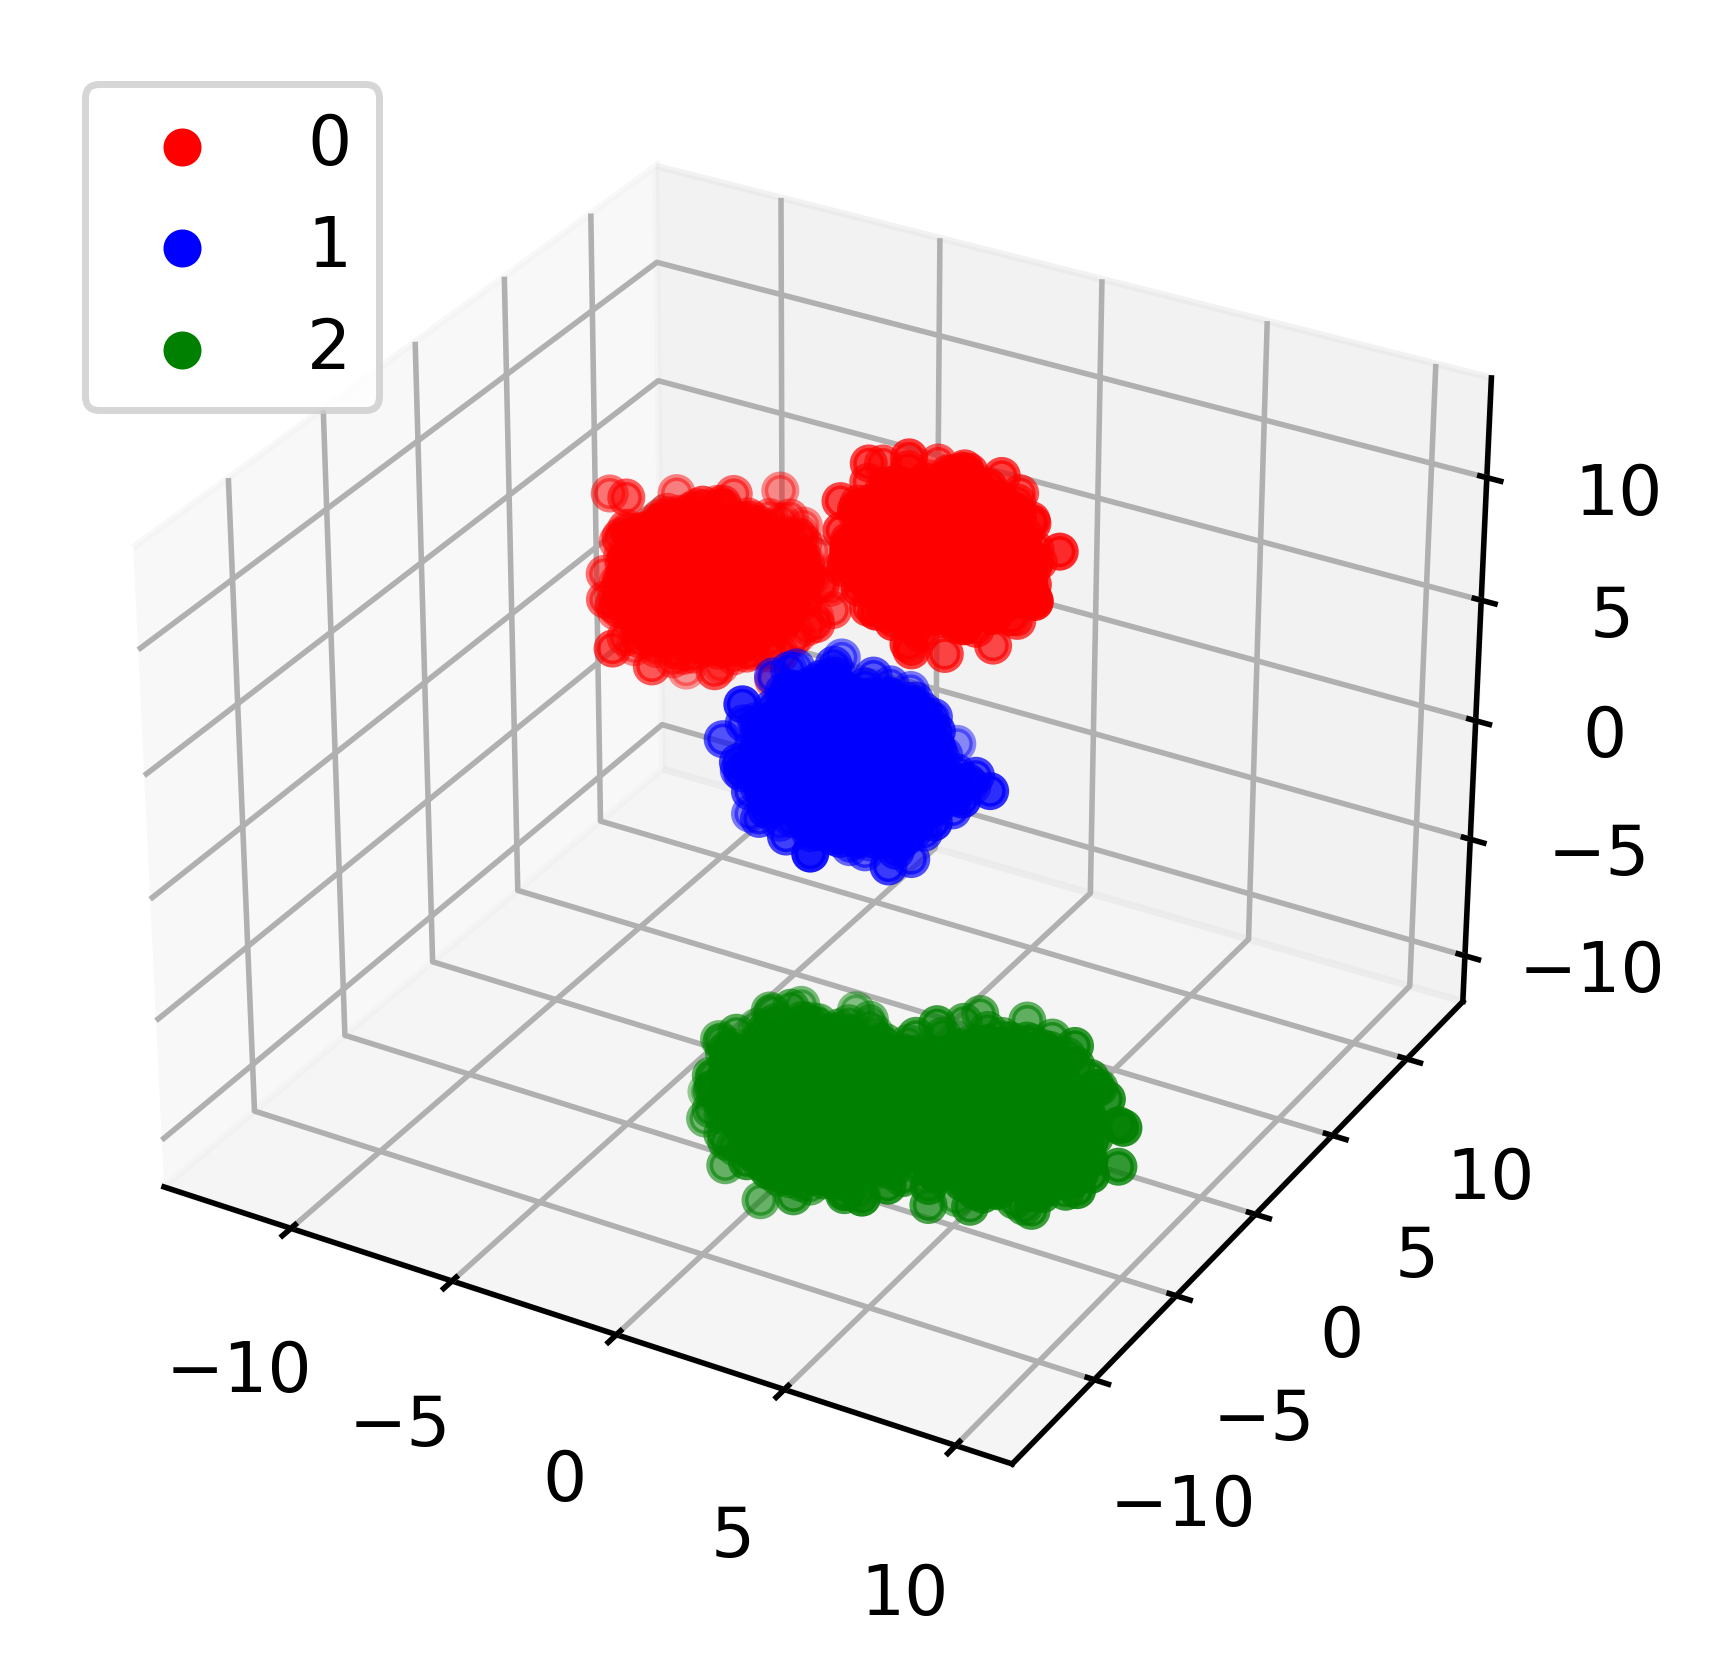

In [57]:
model = KMeans(n_clusters=3, init='random',max_iter=1000,tol=10**-4)
starttime=time.time()
sklearn_iterations = 0
for i in range(10):    
    model.fit_predict(data[0])
    sklearn_iterations += model.n_iter_
sklearn_stopwatch = time.time() - starttime
print(f"sklearn K-means' time: {sklearn_stopwatch/10.}")
print(f"sklearn K-means' iterations: {sklearn_iterations/10.}")

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,model.cluster_centers_.tolist()),axis=1)

fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow','Grey')

for i in range(3):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

[3.298170328140259, 15.162484884262085, 0.3016641139984131]


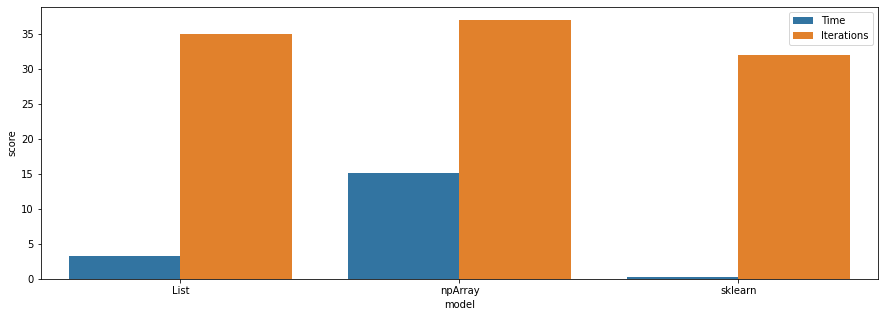

In [58]:
data = pd.DataFrame()
scores = []
it = []
scores.append(list_stopwatch)
scores.append(np_stopwatch)
scores.append(sklearn_stopwatch)
it.append(list_iterations)
it.append(np_iterations)
it.append(sklearn_iterations)
print(scores)
data['model'] = ['List', 'npArray', 'sklearn'] * 2
data['metric'] = ['Time'] * len(scores) + ['Iterations'] * len(it)
data['score'] = scores + it
plt.figure(figsize=(15,5))
_ = sns.barplot(x='model', y='score', data=data, hue='metric')
_ = plt.legend(loc='upper right')

`sklearn.KMeans` always performs best; this time list-based implementation is working pretty similar.

Last section for this project: we input vectors in 6 dimensions to see if and how performances change.

In [136]:
# Dataset: 10,000 samples/rows, 6 dimensions, 5 "real" clusters
data = make_blobs(n_samples=10000, n_features=6, centers=5,random_state=42)

k = 5 # Number of clusters

print(data[0])
print('\n')
# Save onto a CSV
np.savetxt("data.csv", data[0], delimiter=",")

# data[1] is an array of labels which we'll use later to compare our clusters with "real" ones
print(data[1])

# Simulating CSV user's input
df = pd.read_csv('data.csv', sep = ',', header=None, names=["x","y","z","w","q","t"])
df

[[  0.33923282  -4.96317149   3.20615474  -7.50287613  -4.00598815
   -2.58970188]
 [  0.03852655  -2.75465081   2.09444415  -7.89866317  -4.66978286
   -2.25763897]
 [ -0.0785281    6.51180683  -5.91067582   1.61826734   1.39993178
   -8.67855255]
 ...
 [  5.94699443  -5.55962296  -5.25841157  -6.89965802  -2.99983684
    0.44356831]
 [ -9.0064674    7.47351801   1.92845462   4.96417913 -10.25609251
    7.20175078]
 [ -4.27824793   9.38103254   4.25600409   2.17545009  -6.89752217
   -7.85650964]]


[3 3 4 ... 2 1 0]


x         y         z         w          q          t
0     0.339233 -4.963171  3.206155 -7.502876  -4.005988  -2.589702
1     0.038527 -2.754651  2.094444 -7.898663  -4.669783  -2.257639
2    -0.078528  6.511807 -5.910676  1.618267   1.399932  -8.678553
3    -1.172113 -6.282295  0.884397 -5.236586  -3.672517  -1.189293
4    -8.448135  8.447619  0.938704  5.199838  -7.482454  10.162355
...        ...       ...       ...       ...        ...        ...
9995  5.337726 -6.354307 -6.644024 -5.987191  -3.951914   0.130059
9996 -1.927637 -4.300335  1.474614 -7.826886  -4.872155  -2.752107
9997  5.946994 -5.559623 -5.258412 -6.899658  -2.999837   0.443568
9998 -9.006467  7.473518  1.928455  4.964179 -10.256093   7.201751
9999 -4.278248  9.381033  4.256004  2.175450  -6.897522  -7.856510

[10000 rows x 6 columns]

PCA helps us visualizing dataset in 2D.

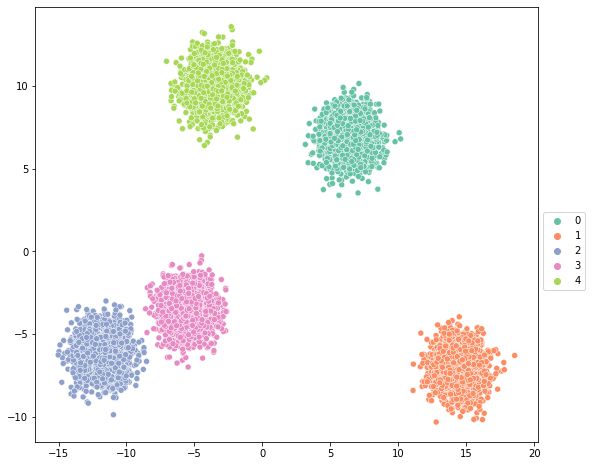

In [137]:
pca = PCA(n_components=2).fit_transform(data[0])
fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=data[1],palette="Set2");
plt.legend(loc=(1.01,0.35));

In [140]:
mu,it=list_kmeans(5,data[0].tolist(),1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')
print("\n")
print(f'The algorithm converged in {it} iterations')

[[-1.4270502972302759, 6.623763907420792, -6.2705582410325125, -0.020116249035116163, 1.8640787902007234, -9.911999052436046], [-2.2901260605150817, 8.538893885983779, 3.8040085806097954, 0.8772988731420146, -4.111253585525327, -7.131661493460083], [-2.8010088919682943, 7.451095319501665, 5.522988613375261, 1.89533248692793, -7.0601071047418955, -3.687002025431086], [-2.225430089626892, -3.5570699387084916, 1.2744707339302943, -6.173641845535889, -3.311861563358509, -3.273450558391664], [6.938692773065524, -6.94521479297077, -7.1824992293315075, -5.408572861228838, -2.038255865432564, -0.5055614836967279]]
[[2.0975132688218623, -5.908740279137918, -7.605537336459342], [4.1919363605952, -12.246312499653499, 9.65604942615813], [7.162761881022666, -5.46940235100279, -6.741994581469366], [-7.97681386846722, 7.539072916143994, 0.9470063315337651], [-3.6065434916194086, 9.355208326757275, 4.553465329396488]]

The centroids of k-clusters are [[-1.330528719478036, -4.204875083492852, 2.2490259

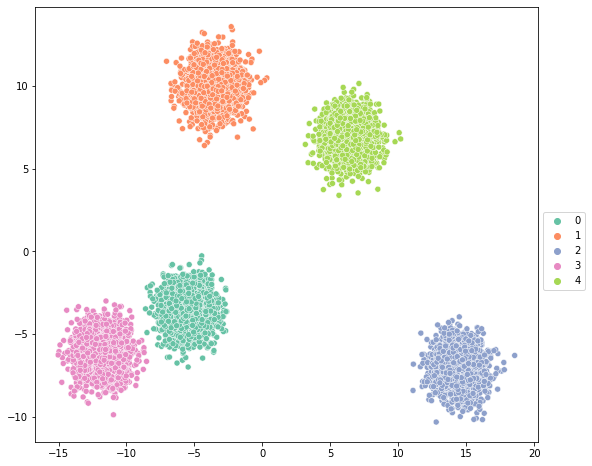

In [141]:
def coloring(point1,point2,point3,point4,point5,point6,mu):
    mindist=float('inf')
    ans=None
    point=[point1,point2,point3,point4,point5,point6]
    for i,pt in enumerate(mu):
        if dist_np(np.array(pt),np.array(point))<mindist:
            mindist=dist_np(np.array(pt),np.array(point))
            ans=i
    return ans

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,df.w,df.q,df.t,mu),axis=1)

# Visualizing the dataset based on the clusters that we created using k-means clustering algorithm
pca = PCA(n_components=3).fit_transform(data[0])
fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=df['color'],palette="Set2");
plt.legend(loc=(1.01,0.35));

In [146]:
mu,it = npkmeans(5,data[0],1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')
print("\n")
print(f'The algorithm converged in {it} iterations')

[[ -1.33262499   6.88785436  -7.02355988   2.24437861   0.18251909
   -9.08548333]
 [  7.67227918  -6.63630504  -5.98642594  -6.82085123  -6.27209184
    0.97284461]
 [  6.91881661  -4.43917016  -7.28019515  -6.32386055  -4.41048229
    0.22294899]
 [ -9.2704488    9.76444688   1.18367656   5.34087602  -8.7318503
    9.38433491]
 [ -9.64541582   6.99009921  -0.41922834   3.57007733 -10.29260468
    9.95529949]]
[[1.9436979512648571, -6.9126504491918865, -6.873450977271873], [4.16063296525123, -9.578596361114037, 9.407972308887368], [-8.802262140502895, 7.313507084528769, 2.057496860008619], [-2.4942207425946314, 8.950627260978939, 4.647828369976595], [6.62358517027456, -5.725055050571822, -6.350633573782171]]

The centroids of k-clusters are [[-1.330528719478036, -4.204875083492852, 2.2490259341307826, -7.190171159360618, -4.15628095199876, -2.6861296489240605], [-1.6702405085974692, 7.331116005842495, -0.6999504492147806, 1.140281779125959, -2.5053067538730227, -7.976724502935564], [-

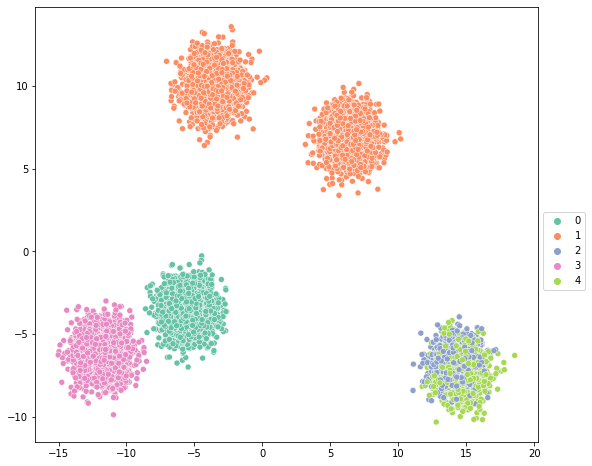

In [147]:
df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,df.w,df.q,df.t,mu),axis=1)

# Visualizing the dataset based on the clusters that we created using k-means clustering algorithm
pca = PCA(n_components=3).fit_transform(data[0])
fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=df['color'],palette="Set2");
plt.legend(loc=(1.01,0.35));


The centroids of k-clusters are [[-8.83549240081343, 7.338711971041305, 2.0697009467641774, 4.1561901534343155, -9.596482139432212, 9.407095174947315], [-2.50354836477064, 8.97872249148552, 4.612033245288496, 1.9947265093965958, -6.876378588749435, -6.880081845598172], [6.645163495192646, -5.774393102758311, -6.374231147790245, -6.355808281033503, -3.9391113770453194, 0.4988690557985458], [-0.8369326524242983, 5.683509520199464, -6.011934143718058, 0.2858370488553197, 1.8657650810033868, -9.073367160272912], [-1.330528719478038, -4.2048750834928565, 2.2490259341307874, -7.190171159360628, -4.156280951998755, -2.6861296489240627]]


The algorithm converged in 3 iterations


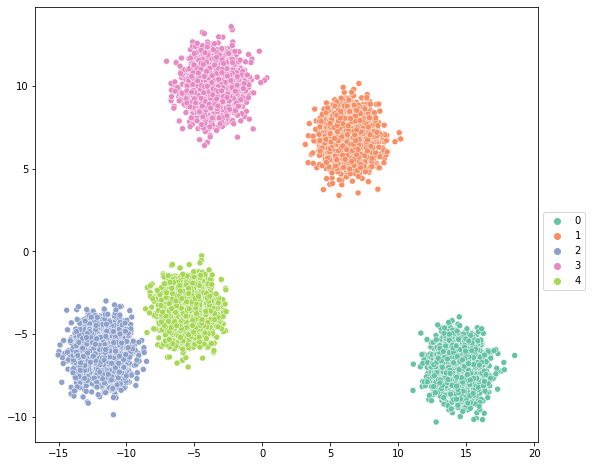

In [148]:
model = KMeans(n_clusters=k,init='random',max_iter=1000,tol=10**-4,random_state=42)
y_predict = model.fit_predict(data[0])
print(f'\nThe centroids of k-clusters are {model.cluster_centers_.tolist()}')
print("\n")
print(f'The algorithm converged in {model.n_iter_} iterations')

df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z,df.w,df.q,df.t,model.cluster_centers_.tolist()),axis=1)

# Visualizing the dataset based on the clusters that we created using k-means clustering algorithm
pca = PCA(n_components=3).fit_transform(data[0])
fig = plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=df['color'],palette="Set2");
plt.legend(loc=(1.01,0.35));